# Importing Liabraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle 
import statsmodels.api as sm

from scipy.stats import zscore
from scipy import stats
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [2]:
import os

# Define the directory path
directory = 'plots/'

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Displaying Data

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
features=pd.read_csv("features.csv")
stores=pd.read_csv("stores.csv")

In [4]:
train.shape
display(train.head(5))
train.info()
print(".....NULL VALUES....")
train.isnull().sum()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
.....NULL VALUES....


Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [5]:
test.shape
display(test.head(5))
test.info()
print(".....NULL VALUES....")
test.isnull().sum()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB
.....NULL VALUES....


Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [6]:
features.shape
display(features.head(10))
features.info()
print(".....NULL VALUES....")
features.isnull().sum()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
.....NULL VALUES....


Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [7]:
stores.shape
display(stores.head(5))
stores.info()
print(".....NULL VALUES....")
stores.isnull().sum()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
.....NULL VALUES....


Store    0
Type     0
Size     0
dtype: int64

# Feature Engineering

## Dealing with missing values and Data Merging

In [8]:
features["CPI"].fillna(features["CPI"].median(),inplace=True)
features["Unemployment"].fillna(features["Unemployment"].median(),inplace=True)
columns_to_fill = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
features[columns_to_fill] = features[columns_to_fill].fillna(0)
train['IsHoliday'] = train['IsHoliday'].map({False : 0, True : 1}).astype('int')
test['IsHoliday'] = test['IsHoliday'].map({False : 0, True : 1}).astype('int')
features['IsHoliday'] = features['IsHoliday'].map({False : 0, True : 1}).astype('int')

In [9]:
# Merging data
df1 = pd.merge(train,stores,on='Store',how='inner')
df1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,0,A,151315
1,1,1,2010-02-12,46039.49,1,A,151315
2,1,1,2010-02-19,41595.55,0,A,151315
3,1,1,2010-02-26,19403.54,0,A,151315
4,1,1,2010-03-05,21827.90,0,A,151315
...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,B,118221
421566,45,98,2012-10-05,628.10,0,B,118221
421567,45,98,2012-10-12,1061.02,0,B,118221
421568,45,98,2012-10-19,760.01,0,B,118221


In [10]:

df2 = pd.merge(stores, features, on='Store', how='inner')
df2

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,0
1,1,A,151315,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,1
2,1,A,151315,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,0
3,1,A,151315,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,0
4,1,A,151315,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,B,118221,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,182.764003,7.806,0
8186,45,B,118221,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,182.764003,7.806,0
8187,45,B,118221,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,182.764003,7.806,0
8188,45,B,118221,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,182.764003,7.806,0


In [11]:
# create unique column (diff) for the combination of store and date
df1['diff'] = df1['Store'].astype(str) + '-' + df1['Date']
df2['diff'] = df2['Store'].astype(str) + '-' + df2['Date']

In [12]:
df1.tail(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,diff
421565,45,98,2012-09-28,508.37,0,B,118221,45-2012-09-28
421566,45,98,2012-10-05,628.10,0,B,118221,45-2012-10-05
421567,45,98,2012-10-12,1061.02,0,B,118221,45-2012-10-12
421568,45,98,2012-10-19,760.01,0,B,118221,45-2012-10-19
421569,45,98,2012-10-26,1076.80,0,B,118221,45-2012-10-26


In [13]:
# df1 having 2010 to 2012-oct data
# df2 having 2010 to 2013 data
# so we need to split (2010 to 2012-oct data) and (2012-nov to 2013 data) from df2
# and (2010 to 2012-oct data) add to df1

In [14]:
# make a list with diff column for df1
df1_list = df1['diff'].to_list()
df1_list 

['1-2010-02-05',
 '1-2010-02-12',
 '1-2010-02-19',
 '1-2010-02-26',
 '1-2010-03-05',
 '1-2010-03-12',
 '1-2010-03-19',
 '1-2010-03-26',
 '1-2010-04-02',
 '1-2010-04-09',
 '1-2010-04-16',
 '1-2010-04-23',
 '1-2010-04-30',
 '1-2010-05-07',
 '1-2010-05-14',
 '1-2010-05-21',
 '1-2010-05-28',
 '1-2010-06-04',
 '1-2010-06-11',
 '1-2010-06-18',
 '1-2010-06-25',
 '1-2010-07-02',
 '1-2010-07-09',
 '1-2010-07-16',
 '1-2010-07-23',
 '1-2010-07-30',
 '1-2010-08-06',
 '1-2010-08-13',
 '1-2010-08-20',
 '1-2010-08-27',
 '1-2010-09-03',
 '1-2010-09-10',
 '1-2010-09-17',
 '1-2010-09-24',
 '1-2010-10-01',
 '1-2010-10-08',
 '1-2010-10-15',
 '1-2010-10-22',
 '1-2010-10-29',
 '1-2010-11-05',
 '1-2010-11-12',
 '1-2010-11-19',
 '1-2010-11-26',
 '1-2010-12-03',
 '1-2010-12-10',
 '1-2010-12-17',
 '1-2010-12-24',
 '1-2010-12-31',
 '1-2011-01-07',
 '1-2011-01-14',
 '1-2011-01-21',
 '1-2011-01-28',
 '1-2011-02-04',
 '1-2011-02-11',
 '1-2011-02-18',
 '1-2011-02-25',
 '1-2011-03-04',
 '1-2011-03-11',
 '1-2011-03-18

In [15]:
# filter 2010 to 2012-oct data from df2 based on df1_list
df2_indf1 = df2[df2['diff'].isin(df1_list)]
df2_indf1.reset_index(drop=True, inplace=True)
df2_indf1.head(3)

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,diff
0,1,A,151315,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,1-2010-02-05
1,1,A,151315,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,1-2010-02-12
2,1,A,151315,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,1-2010-02-19


In [16]:
# another filter for 2012-oct to 2013 data from df2 not in df1_list (~)
df2_notindf1 = df2[~df2['diff'].isin(df1_list)]
df2_notindf1.reset_index(drop=True, inplace=True)
df2_notindf1.head(3)

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,diff
0,1,A,151315,2012-11-02,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,0,1-2012-11-02
1,1,A,151315,2012-11-09,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,0,1-2012-11-09
2,1,A,151315,2012-11-16,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,0,1-2012-11-16


In [17]:
# 2010 to 2013     = 8190 (total)
# 2010 to 2012-oct = 6435
# 2012-nov to 2013 = 1755

df2.shape, df2_indf1.shape, df2_indf1.shape

((8190, 15), (6435, 15), (6435, 15))

In [18]:
# check unique columns
df2['diff'].nunique(), df2_indf1['diff'].nunique(), df2_indf1['diff'].nunique() 

(8190, 6435, 6435)

In [19]:
# merge df1 and df2(2010 to 2012-oct) data based on 'diff' column
# 'inner' - merge columns based on exact 'diff' in both data frames

df3 = pd.merge(df1, df2_indf1, on='diff', how='inner')
df3.tail(3)

,Store_x,Dept,Date_x,Weekly_Sales,IsHoliday_x,Type_x,Size_x,diff,Store_y,Type_y,...,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
421567,45,95,2012-10-26,56017.47,0,B,118221,45-2012-10-26,45,B,...,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0
421568,45,97,2012-10-26,6817.48,0,B,118221,45-2012-10-26,45,B,...,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0
421569,45,98,2012-10-26,1076.80,0,B,118221,45-2012-10-26,45,B,...,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0


In [20]:
# drop the duplicate columns and rename it
df3.drop(columns=['Store_y','Type_y','Size_y','Date_y','IsHoliday_y'], inplace=True)
df3.rename(columns={'Store_x':'Store', 'Date_x':'Date', 'IsHoliday_x':'IsHoliday', 'Type_x':'Type', 'Size_x':'Size'}, inplace=True)
df3.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,diff,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,0,A,151315,1-2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,2,2010-02-05,50605.27,0,A,151315,1-2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
2,1,3,2010-02-05,13740.12,0,A,151315,1-2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106


In [21]:

# df1 (2010 to 2012-oct)           - 'Store', 'Date', 'Dept'
# df2_notinlist (2012-nov to 2013) - 'Store', 'Date'         - 'Dept' is missing

# so we need make df2_notinlist into 'Dept' wise data

In [22]:
# filter 'store' and 'dept' column from sales dataframe
s = train[['Store','Dept']]
s

,Store,Dept
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
421565,45,98
421566,45,98
421567,45,98
421568,45,98


In [23]:
# remove duplicates from the combination of 'store' and 'dept'

s.drop_duplicates(subset=['Store', 'Dept'], inplace=True)
s.reset_index(drop=True, inplace=True)
s

C:\Users\vanda\AppData\Local\Temp\ipykernel_15884\3196299284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.drop_duplicates(subset=['Store', 'Dept'], inplace=True)


,Store,Dept
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
...,...,...
3326,45,94
3327,45,95
3328,45,96
3329,45,97


In [24]:
# make dataframe of 's' and 'df2_notinlist (2012-nov to 2013)' based on 'store' column
# outer - it create rows for all combinations like (store,dept,date,etc.,)

df4 = pd.merge(s, df2_notindf1, on='Store', how='outer')
df4.tail()

,Store,Dept,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,diff
129904,45,98,B,118221,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,182.764003,7.806,0,45-2013-06-28
129905,45,98,B,118221,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,182.764003,7.806,0,45-2013-07-05
129906,45,98,B,118221,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,182.764003,7.806,0,45-2013-07-12
129907,45,98,B,118221,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,182.764003,7.806,0,45-2013-07-19
129908,45,98,B,118221,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,182.764003,7.806,0,45-2013-07-26


In [25]:
# concatinate both dataframes into single dataframe (2010 to 2013)

df5 = pd.concat([df3, df4])
df5.reset_index(drop=True, inplace=True)
df5.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,diff,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
551474,45,98,2013-06-28,NaN,0,B,118221,45-2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,182.764003,7.806
551475,45,98,2013-07-05,NaN,0,B,118221,45-2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,182.764003,7.806
551476,45,98,2013-07-12,NaN,0,B,118221,45-2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,182.764003,7.806
551477,45,98,2013-07-19,NaN,0,B,118221,45-2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,182.764003,7.806
551478,45,98,2013-07-26,NaN,0,B,118221,45-2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,182.764003,7.806


In [26]:
# encoding for catagorical features into numerical
df5['Type'] = df5['Type'].map({'A':1, 'B':2, 'C':3})

df5.tail(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,diff,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
551476,45,98,2013-07-12,NaN,0,2,118221,45-2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,182.764003,7.806
551477,45,98,2013-07-19,NaN,0,2,118221,45-2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,182.764003,7.806
551478,45,98,2013-07-26,NaN,0,2,118221,45-2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,182.764003,7.806


In [27]:
# drop 'diff' column and sort the dataframe in ascending order

df5.drop(columns=['diff'], inplace=True)

df5 = df5.sort_values(by=['Date','Store','Dept'])
df5.reset_index(drop=True, inplace=True)

df5.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551479 entries, 0 to 551478
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         551479 non-null  int64  
 1   Dept          551479 non-null  int64  
 2   Date          551479 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     551479 non-null  int32  
 5   Type          551479 non-null  int64  
 6   Size          551479 non-null  int64  
 7   Temperature   551479 non-null  float64
 8   Fuel_Price    551479 non-null  float64
 9   MarkDown1     551479 non-null  float64
 10  MarkDown2     551479 non-null  float64
 11  MarkDown3     551479 non-null  float64
 12  MarkDown4     551479 non-null  float64
 13  MarkDown5     551479 non-null  float64
 14  CPI           551479 non-null  float64
 15  Unemployment  551479 non-null  float64
dtypes: float64(10), int32(1), int64(4), object(1)
memory usage: 65.2+ MB


### Adding markdown column

In [28]:
df5['Total_MarkDown'] = df5['MarkDown1']+df5['MarkDown2']+df5['MarkDown3']+df5['MarkDown4']+df5['MarkDown5']
df5.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True) 
df5

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Total_MarkDown
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,211.096358,8.106,0.00
1,1,2,2010-02-05,50605.27,0,1,151315,42.31,2.572,211.096358,8.106,0.00
2,1,3,2010-02-05,13740.12,0,1,151315,42.31,2.572,211.096358,8.106,0.00
3,1,4,2010-02-05,39954.04,0,1,151315,42.31,2.572,211.096358,8.106,0.00
4,1,5,2010-02-05,32229.38,0,1,151315,42.31,2.572,211.096358,8.106,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,2013-07-26,NaN,0,2,118221,76.06,3.804,182.764003,7.806,2941.26
551475,45,95,2013-07-26,NaN,0,2,118221,76.06,3.804,182.764003,7.806,2941.26
551476,45,96,2013-07-26,NaN,0,2,118221,76.06,3.804,182.764003,7.806,2941.26
551477,45,97,2013-07-26,NaN,0,2,118221,76.06,3.804,182.764003,7.806,2941.26


### Segregating Date feature into Day, Month, and Year new features and drop the Date column

In [29]:
# Make Date feature into --> Day, Month, Year new features and drop Date column
df5['Date'] = pd.to_datetime(df5['Date'])
df5['Day'] = df5['Date'].dt.day
df5['Month'] = df5['Date'].dt.month
df5['Year'] = df5['Date'].dt.year
#df5.drop(columns=['Date'], inplace=True)
df5

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Total_MarkDown,Day,Month,Year
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,211.096358,8.106,0.00,5,2,2010
1,1,2,2010-02-05,50605.27,0,1,151315,42.31,2.572,211.096358,8.106,0.00,5,2,2010
2,1,3,2010-02-05,13740.12,0,1,151315,42.31,2.572,211.096358,8.106,0.00,5,2,2010
3,1,4,2010-02-05,39954.04,0,1,151315,42.31,2.572,211.096358,8.106,0.00,5,2,2010
4,1,5,2010-02-05,32229.38,0,1,151315,42.31,2.572,211.096358,8.106,0.00,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,2013-07-26,NaN,0,2,118221,76.06,3.804,182.764003,7.806,2941.26,26,7,2013
551475,45,95,2013-07-26,NaN,0,2,118221,76.06,3.804,182.764003,7.806,2941.26,26,7,2013
551476,45,96,2013-07-26,NaN,0,2,118221,76.06,3.804,182.764003,7.806,2941.26,26,7,2013
551477,45,97,2013-07-26,NaN,0,2,118221,76.06,3.804,182.764003,7.806,2941.26,26,7,2013


In [30]:
# check datatypes of all features and everything in numerical
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551479 entries, 0 to 551478
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Store           551479 non-null  int64         
 1   Dept            551479 non-null  int64         
 2   Date            551479 non-null  datetime64[ns]
 3   Weekly_Sales    421570 non-null  float64       
 4   IsHoliday       551479 non-null  int32         
 5   Type            551479 non-null  int64         
 6   Size            551479 non-null  int64         
 7   Temperature     551479 non-null  float64       
 8   Fuel_Price      551479 non-null  float64       
 9   CPI             551479 non-null  float64       
 10  Unemployment    551479 non-null  float64       
 11  Total_MarkDown  551479 non-null  float64       
 12  Day             551479 non-null  int32         
 13  Month           551479 non-null  int32         
 14  Year            551479 non-null  int

In [31]:
df5.describe().T 

,count,mean,min,25%,50%,75%,max,std
Store,551479.0,22.270485,1.0,11.0,22.0,33.0,45.0,12.796872
Dept,551479.0,44.603013,1.0,19.0,38.0,74.0,99.0,30.416079
Date,551479,2011-11-15 02:09:52.119736576,2010-02-05 00:00:00,2010-12-31 00:00:00,2011-11-18 00:00:00,2012-10-12 00:00:00,2013-07-26 00:00:00,NaN
Weekly_Sales,421570.0,15981.258123,-4988.94,2079.65,7612.03,20205.8525,693099.36,22711.183519
IsHoliday,551479.0,0.071905,0.0,0.0,0.0,0.0,1.0,0.25833
Type,551479.0,1.594791,1.0,1.0,1.0,2.0,3.0,0.669624
Size,551479.0,136073.691863,34875.0,93638.0,128107.0,202505.0,219622.0,61207.331445
Temperature,551479.0,58.703624,-7.29,45.16,59.94,73.16,101.95,18.685408
Fuel_Price,551479.0,3.41301,2.472,3.05,3.524,3.746,4.468,0.427725
CPI,551479.0,173.029608,126.064,132.747742,182.764003,212.369187,228.976456,38.115416


In [32]:
# check negative weekly_sales count
df5[df5['Weekly_Sales']<=0] 

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Total_MarkDown,Day,Month,Year
389,6,47,2010-02-05,-59.00,0,1,202505,40.43,2.572,212.622352,7.259,0.00,5,2,2010
601,9,49,2010-02-05,-15.00,0,2,125833,38.01,2.572,214.655459,6.415,0.00,5,2,2010
714,11,19,2010-02-05,0.00,0,1,207499,46.04,2.572,214.424881,7.368,0.00,5,2,2010
1039,15,80,2010-02-05,-0.04,0,2,123737,19.83,2.954,131.527903,8.350,0.00,5,2,2010
1345,20,19,2010-02-05,0.00,0,1,203742,25.92,2.784,204.247194,8.187,0.00,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419896,19,47,2012-10-26,-18.00,0,1,203819,56.49,4.071,138.728161,7.992,8090.93,26,10,2012
419943,20,19,2012-10-26,-3.97,0,1,203742,60.04,3.882,216.151590,7.293,13477.58,26,10,2012
420601,29,80,2012-10-26,-178.15,0,2,93638,57.58,3.917,138.728161,9.151,6379.12,26,10,2012
420972,35,80,2012-10-26,-16.51,0,2,103681,58.99,3.882,142.762411,8.665,7637.23,26,10,2012


In [33]:
# negative weekly_sales value convert to the null value

df5['Weekly_Sales'] = df5['Weekly_Sales'].apply(lambda x: np.nan if x<=0 else x)
df5.tail() 

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Total_MarkDown,Day,Month,Year
551474,45,94,2013-07-26,NaN,0,2,118221,76.06,3.804,182.764003,7.806,2941.26,26,7,2013
551475,45,95,2013-07-26,NaN,0,2,118221,76.06,3.804,182.764003,7.806,2941.26,26,7,2013
551476,45,96,2013-07-26,NaN,0,2,118221,76.06,3.804,182.764003,7.806,2941.26,26,7,2013
551477,45,97,2013-07-26,NaN,0,2,118221,76.06,3.804,182.764003,7.806,2941.26,26,7,2013
551478,45,98,2013-07-26,NaN,0,2,118221,76.06,3.804,182.764003,7.806,2941.26,26,7,2013


In [34]:
df5.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,551479.0,22.270485,1.0,11.0,22.0,33.0,45.0,12.796872
Dept,551479.0,44.603013,1.0,19.0,38.0,74.0,99.0,30.416079
Date,551479,2011-11-15 02:09:52.119736576,2010-02-05 00:00:00,2010-12-31 00:00:00,2011-11-18 00:00:00,2012-10-12 00:00:00,2013-07-26 00:00:00,NaN
Weekly_Sales,420212.0,16033.114591,0.01,2120.13,7661.7,20271.265,693099.36,22729.492116
IsHoliday,551479.0,0.071905,0.0,0.0,0.0,0.0,1.0,0.25833
Type,551479.0,1.594791,1.0,1.0,1.0,2.0,3.0,0.669624
Size,551479.0,136073.691863,34875.0,93638.0,128107.0,202505.0,219622.0,61207.331445
Temperature,551479.0,58.703624,-7.29,45.16,59.94,73.16,101.95,18.685408
Fuel_Price,551479.0,3.41301,2.472,3.05,3.524,3.746,4.468,0.427725
CPI,551479.0,173.029608,126.064,132.747742,182.764003,212.369187,228.976456,38.115416


In [35]:
# check null values of all features
df5.isnull().sum() 

Store                  0
Dept                   0
Date                   0
Weekly_Sales      131267
IsHoliday              0
Type                   0
Size                   0
Temperature            0
Fuel_Price             0
CPI                    0
Unemployment           0
Total_MarkDown         0
Day                    0
Month                  0
Year                   0
dtype: int64

In [36]:
df5.tail()  

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Total_MarkDown,Day,Month,Year
551474,45,94,2013-07-26,NaN,0,2,118221,76.06,3.804,182.764003,7.806,2941.26,26,7,2013
551475,45,95,2013-07-26,NaN,0,2,118221,76.06,3.804,182.764003,7.806,2941.26,26,7,2013
551476,45,96,2013-07-26,NaN,0,2,118221,76.06,3.804,182.764003,7.806,2941.26,26,7,2013
551477,45,97,2013-07-26,NaN,0,2,118221,76.06,3.804,182.764003,7.806,2941.26,26,7,2013
551478,45,98,2013-07-26,NaN,0,2,118221,76.06,3.804,182.764003,7.806,2941.26,26,7,2013


In [37]:
df5['Weekly_Sales'] = df5['Weekly_Sales'].fillna(df5['Weekly_Sales'].mean()) 
df5

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Total_MarkDown,Day,Month,Year
0,1,1,2010-02-05,24924.500000,0,1,151315,42.31,2.572,211.096358,8.106,0.00,5,2,2010
1,1,2,2010-02-05,50605.270000,0,1,151315,42.31,2.572,211.096358,8.106,0.00,5,2,2010
2,1,3,2010-02-05,13740.120000,0,1,151315,42.31,2.572,211.096358,8.106,0.00,5,2,2010
3,1,4,2010-02-05,39954.040000,0,1,151315,42.31,2.572,211.096358,8.106,0.00,5,2,2010
4,1,5,2010-02-05,32229.380000,0,1,151315,42.31,2.572,211.096358,8.106,0.00,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,2013-07-26,16033.114591,0,2,118221,76.06,3.804,182.764003,7.806,2941.26,26,7,2013
551475,45,95,2013-07-26,16033.114591,0,2,118221,76.06,3.804,182.764003,7.806,2941.26,26,7,2013
551476,45,96,2013-07-26,16033.114591,0,2,118221,76.06,3.804,182.764003,7.806,2941.26,26,7,2013
551477,45,97,2013-07-26,16033.114591,0,2,118221,76.06,3.804,182.764003,7.806,2941.26,26,7,2013


In [38]:
df5.describe()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Total_MarkDown,Day,Month,Year
count,551479.000000,551479.000000,551479,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000
mean,22.270485,44.603013,2011-11-15 02:09:52.119736576,16033.114591,0.071905,1.594791,136073.691863,58.703624,3.413010,173.029608,7.777867,9608.385462,15.653488,6.277180,2011.392758
min,1.000000,1.000000,2010-02-05 00:00:00,0.010000,0.000000,1.000000,34875.000000,-7.290000,2.472000,126.064000,3.684000,-1692.480000,1.000000,1.000000,2010.000000
25%,11.000000,19.000000,2010-12-31 00:00:00,3465.000000,0.000000,1.000000,93638.000000,45.160000,3.050000,132.747742,6.774000,0.000000,8.000000,3.000000,2010.000000
50%,22.000000,38.000000,2011-11-18 00:00:00,14079.180000,0.000000,1.000000,128107.000000,59.940000,3.524000,182.764003,7.806000,729.310000,16.000000,6.000000,2011.000000
75%,33.000000,74.000000,2012-10-12 00:00:00,16033.114591,0.000000,2.000000,202505.000000,73.160000,3.746000,212.369187,8.494000,12998.400000,23.000000,9.000000,2012.000000
max,45.000000,99.000000,2013-07-26 00:00:00,693099.360000,1.000000,3.000000,219622.000000,101.950000,4.468000,228.976456,14.313000,783529.450000,31.000000,12.000000,2013.000000
std,12.796872,30.416079,NaN,19840.807529,0.258330,0.669624,61207.331445,18.685408,0.427725,38.115416,1.788624,19910.439564,8.776044,3.340134,1.054086


## Outlier detection and dealing

C:\Users\vanda\New folder\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanda\New folder\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanda\New folder\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanda\New folder\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

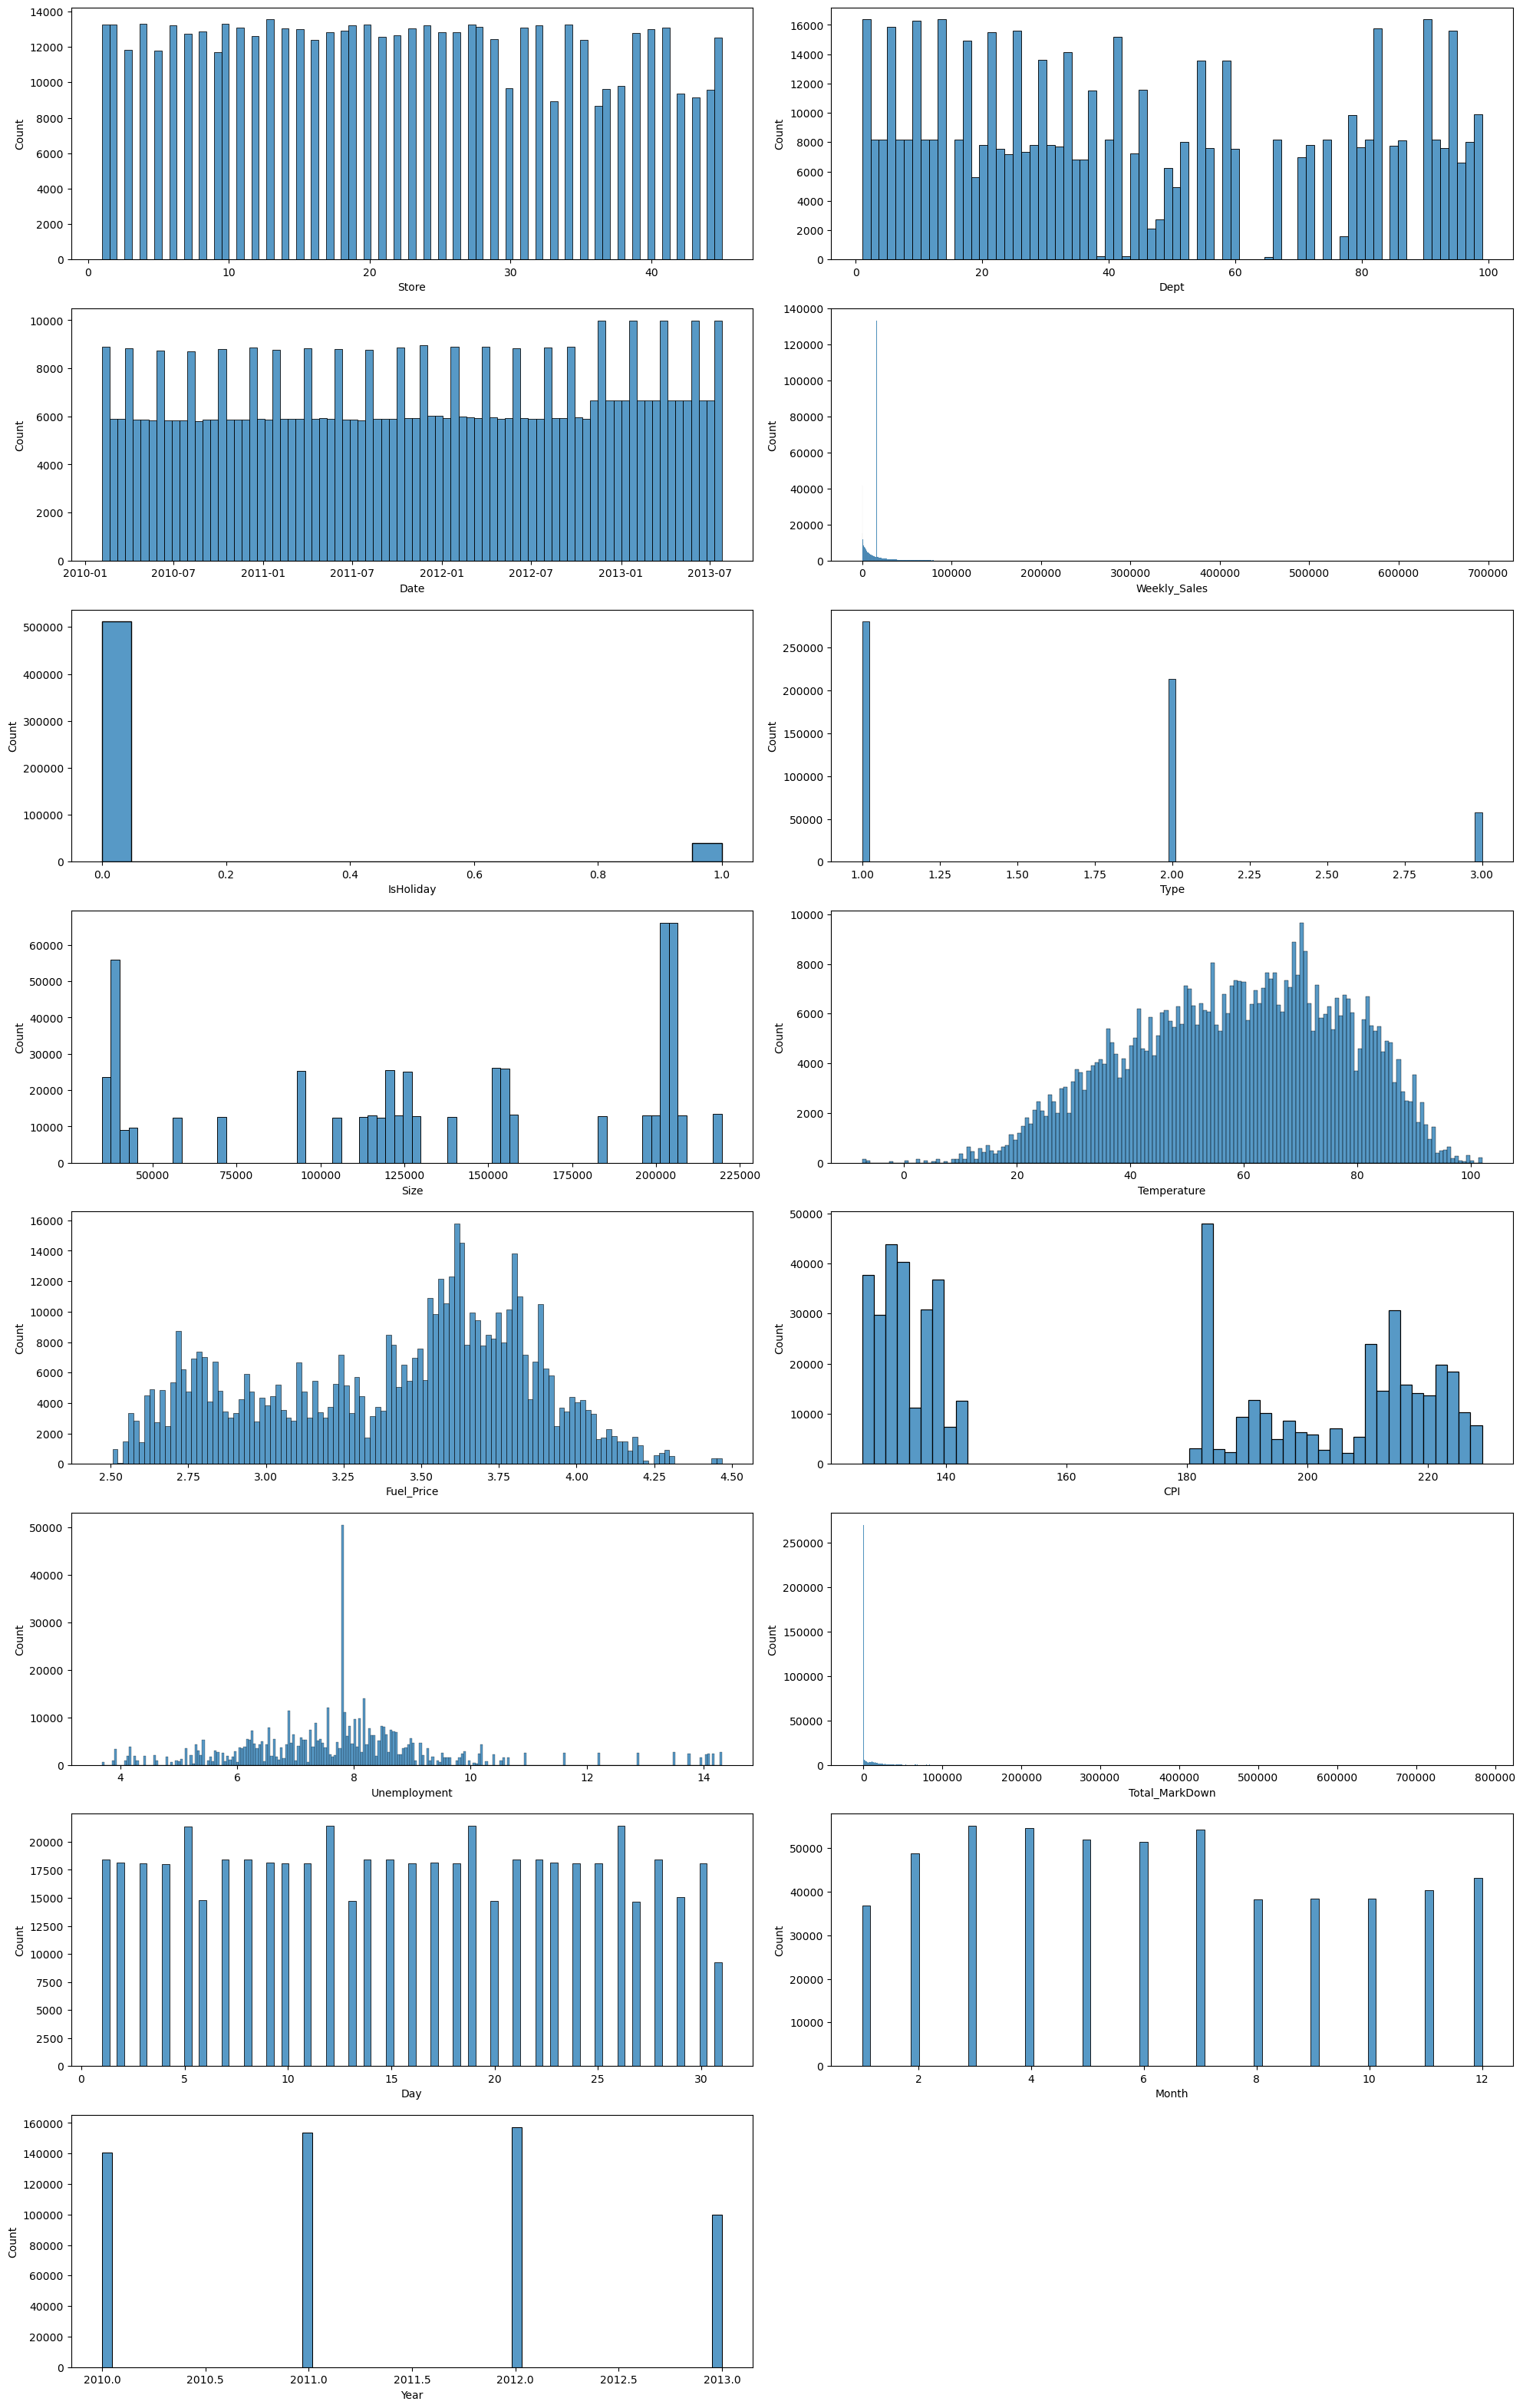

In [39]:
# Visualizing distributions of each feature and knowing if the data is normal.
plt.figure(figsize=(20, 35))
for i, col in enumerate(df5.columns):
    if df5[col].dtype != 'object':  # Check for continuous values
        plt.subplot(9, 2, i+1)  # Creating a subplot
        sns.histplot(df5[col])   # Using histplot for numerical data
        plt.xlabel(col)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show() 

In [40]:
## Dealing with outliers using Z Score
# Define Z score threshold
z_threshold = 3

# Define numerical columns for which to calculate Z scores
numerical_columns = ["Weekly_Sales", "Temperature", "Unemployment", "CPI", "Fuel_Price"]

# Calculate Z-scores for numerical columns
z_scores = stats.zscore(df5[numerical_columns])

# Identify rows containing outliers
outlier_rows = np.any(np.abs(z_scores) > z_threshold, axis=1)

# Remove outlier rows from the DataFrame				
df5 = df5[~outlier_rows] 

C:\Users\vanda\New folder\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanda\New folder\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanda\New folder\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanda\New folder\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

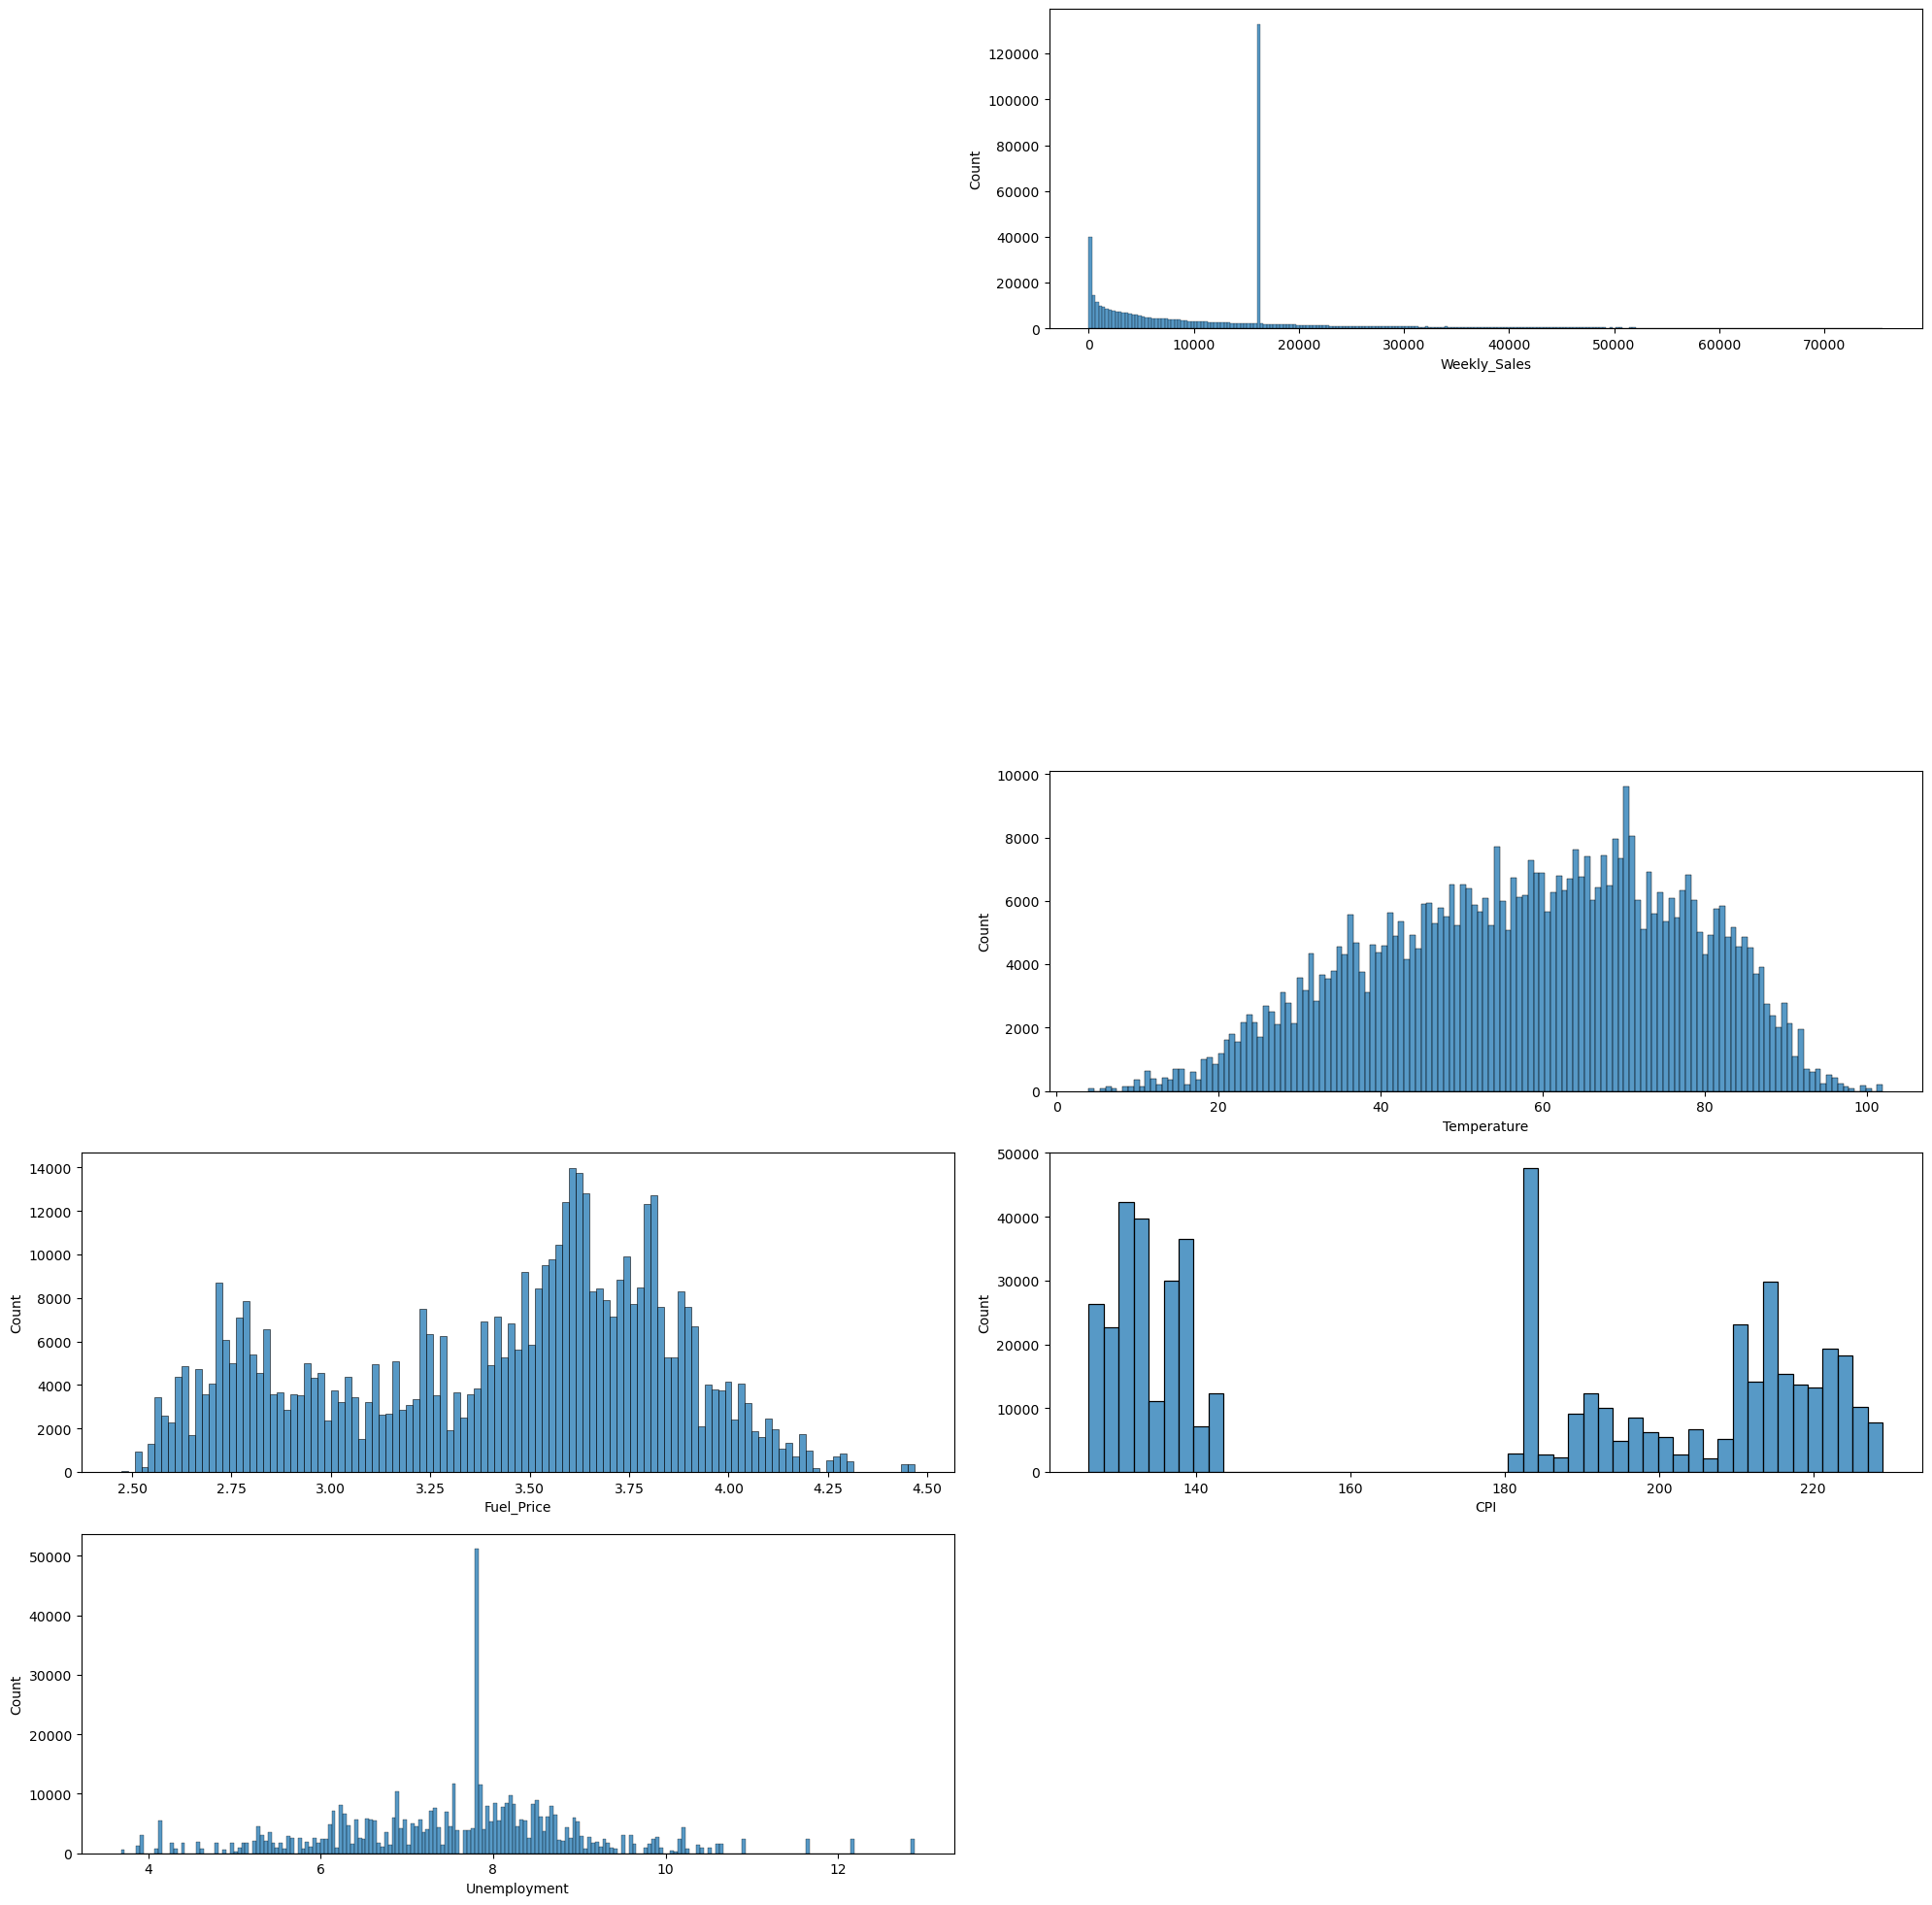

In [41]:
# Visualizing distributions of each feature and knowing if the data is normal.
plt.figure(figsize=(20, 35))
for i, col in enumerate(df5.columns):
    if col in numerical_columns:
        plt.subplot(9, 2, i+1)  # Creating a subplot
        sns.histplot(df5[col])   # Using histplot for numerical data
        plt.xlabel(col)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [42]:
df5.shape
df5

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Total_MarkDown,Day,Month,Year
0,1,1,2010-02-05,24924.500000,0,1,151315,42.31,2.572,211.096358,8.106,0.00,5,2,2010
1,1,2,2010-02-05,50605.270000,0,1,151315,42.31,2.572,211.096358,8.106,0.00,5,2,2010
2,1,3,2010-02-05,13740.120000,0,1,151315,42.31,2.572,211.096358,8.106,0.00,5,2,2010
3,1,4,2010-02-05,39954.040000,0,1,151315,42.31,2.572,211.096358,8.106,0.00,5,2,2010
4,1,5,2010-02-05,32229.380000,0,1,151315,42.31,2.572,211.096358,8.106,0.00,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,2013-07-26,16033.114591,0,2,118221,76.06,3.804,182.764003,7.806,2941.26,26,7,2013
551475,45,95,2013-07-26,16033.114591,0,2,118221,76.06,3.804,182.764003,7.806,2941.26,26,7,2013
551476,45,96,2013-07-26,16033.114591,0,2,118221,76.06,3.804,182.764003,7.806,2941.26,26,7,2013
551477,45,97,2013-07-26,16033.114591,0,2,118221,76.06,3.804,182.764003,7.806,2941.26,26,7,2013


In [43]:
df5_corr = df5.drop(columns=['Day', 'Month', 'Year', 'Store', 'Dept','Total_MarkDown'])

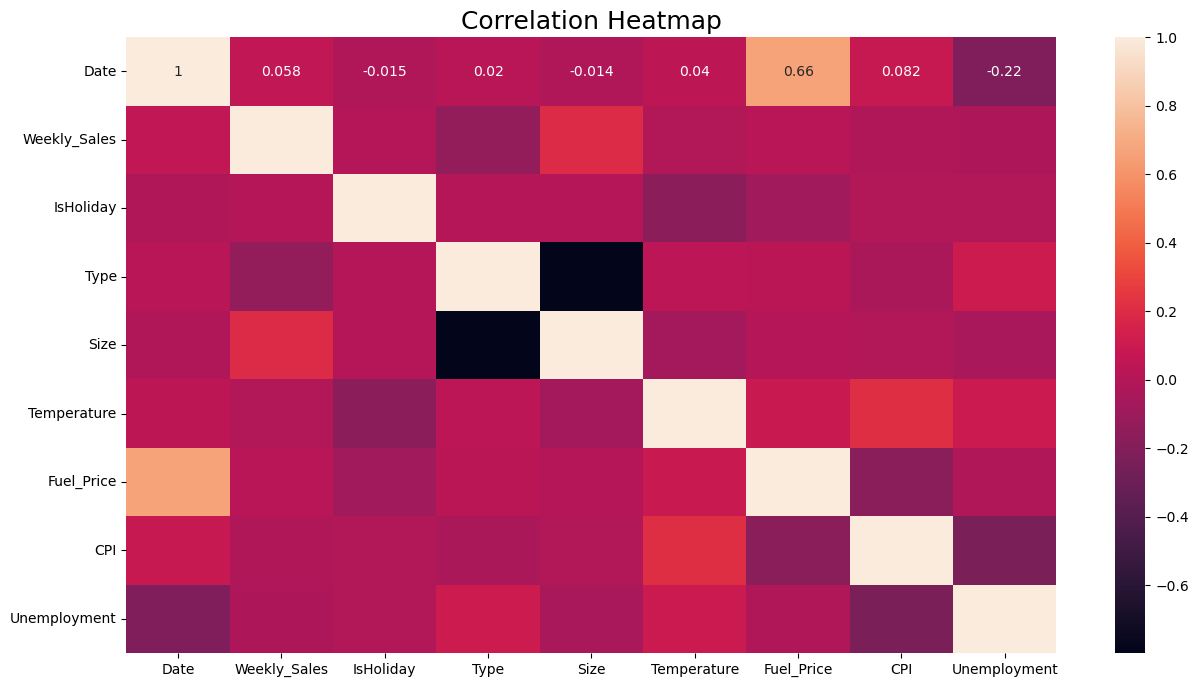

In [44]:
# Calculate the correlation matrix
correlation=df5_corr.corr()
# Create a heatmap
plt.figure(figsize=(15, 8))  # Adjust the figure size if needed
sns.heatmap(correlation,annot=True)
plt.title("Correlation Heatmap", fontsize=18)
plt.show() 

In [45]:
## Barplot of Weekly sales distribution

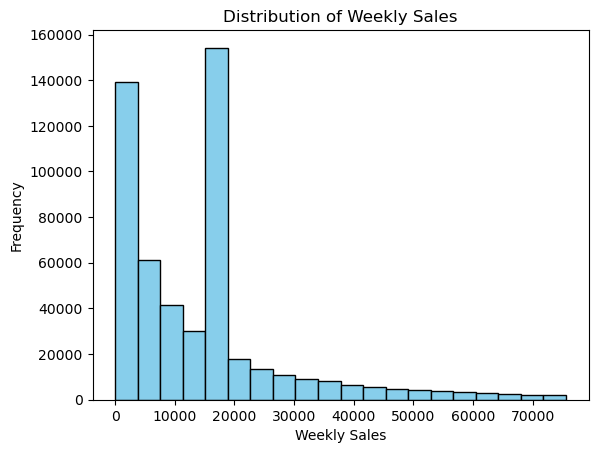

In [46]:
plt.hist(df5['Weekly_Sales'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show() 

In [47]:
## Boxplot of Weekly Sales by Store Typ

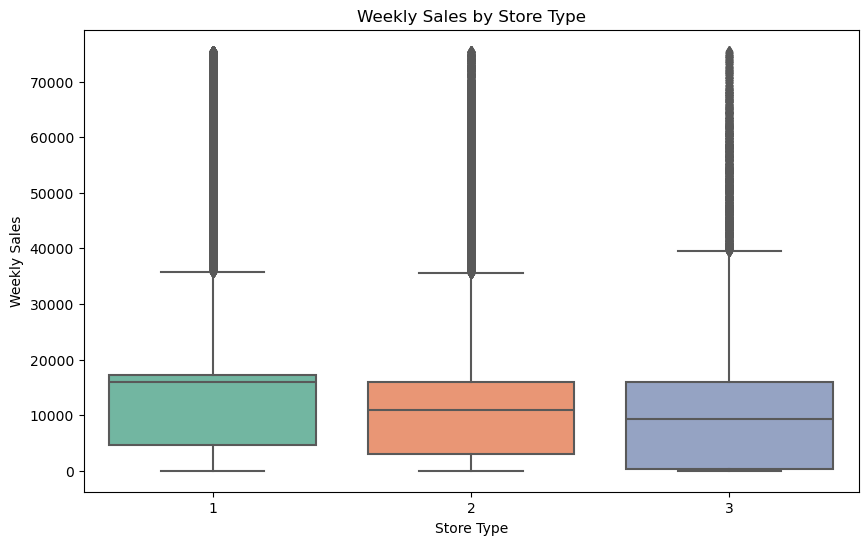

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Weekly_Sales', data=df5, palette='Set2')
plt.title('Weekly Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Weekly Sales')
plt.show()

In [49]:
## Line plot Weekly Sales Over Time

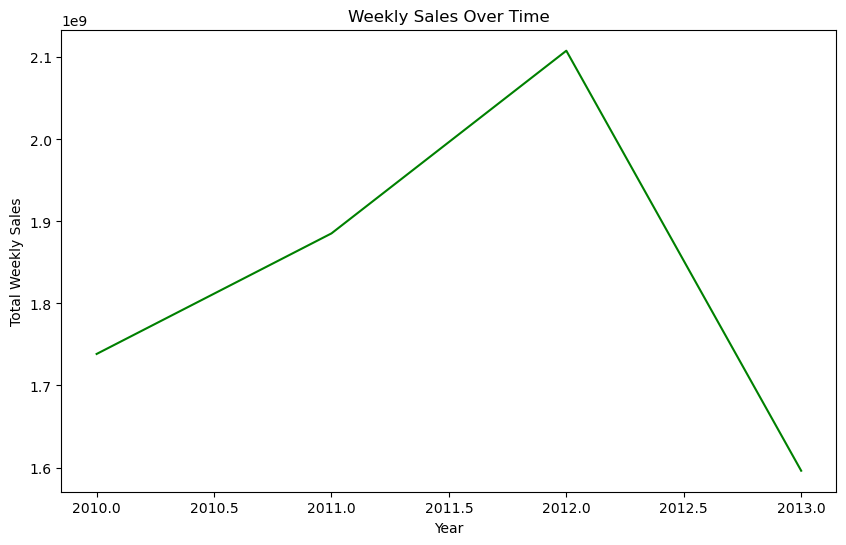

In [50]:
plt.figure(figsize=(10, 6))
weekly_sales = df5.groupby(df5["Year"])['Weekly_Sales'].sum() 
weekly_sales.plot(color='green')

plt.title('Weekly Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Total Weekly Sales')

plt.show() 

In [51]:
## Scatter Plot of Weekly Sales vs. Temperature

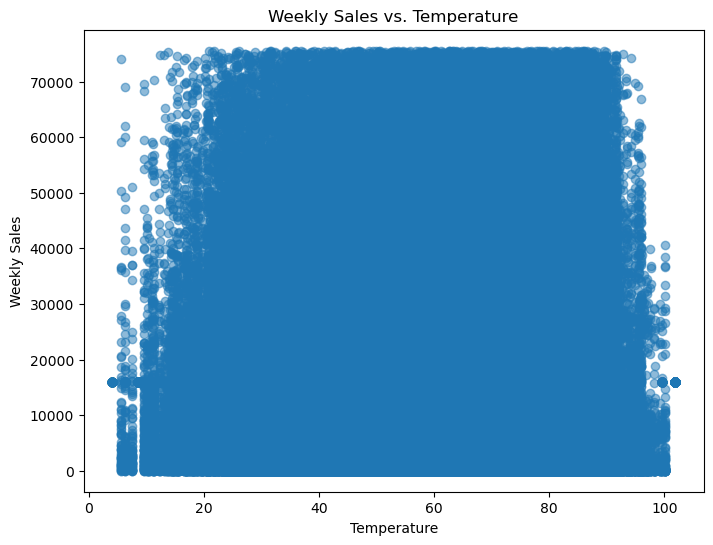

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(df5['Temperature'], df5['Weekly_Sales'], alpha=0.5)
plt.title('Weekly Sales vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show() 

### Average Monthly Sales

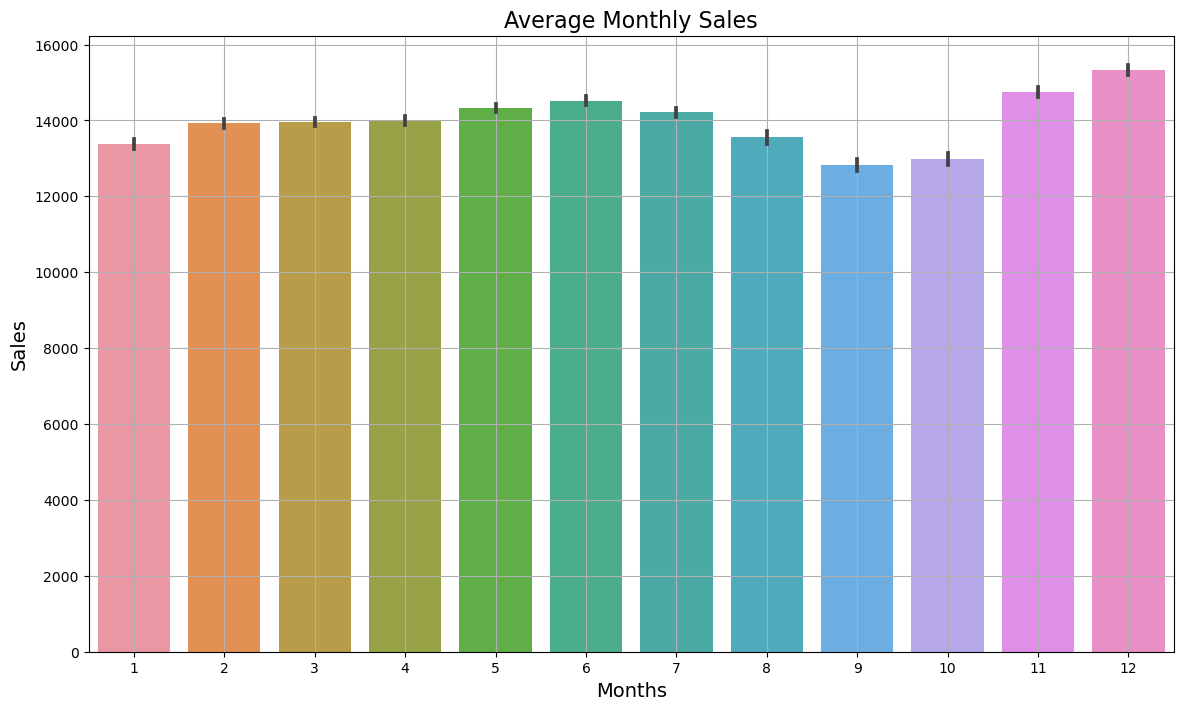

In [53]:
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=df5)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.grid()

### Monthly sales for each Year

In [54]:
data_monthly = pd.crosstab(df5["Year"], df5["Month"], values=df5["Weekly_Sales"],aggfunc='sum')
data_monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,1.408286e+08,1.396518e+08,1.792362e+08,1.453488e+08,1.496340e+08,1.823854e+08,1.458851e+08,1.381125e+08,1.720606e+08,1.466393e+08,1.986518e+08
2011,1.261573e+08,1.382256e+08,1.376707e+08,1.766435e+08,1.420410e+08,1.483443e+08,1.800673e+08,1.435182e+08,1.709127e+08,1.502400e+08,1.576113e+08,2.139875e+08
2012,1.365997e+08,1.500742e+08,1.888736e+08,1.535135e+08,1.545066e+08,1.986103e+08,1.538469e+08,1.930046e+08,1.480995e+08,1.515338e+08,2.670315e+08,2.124067e+08
2013,2.075326e+08,2.136252e+08,2.670315e+08,2.136252e+08,2.670315e+08,2.136252e+08,2.136252e+08,NaN,NaN,NaN,NaN,NaN


C:\Users\vanda\New folder\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanda\New folder\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanda\New folder\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vanda\New folder\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

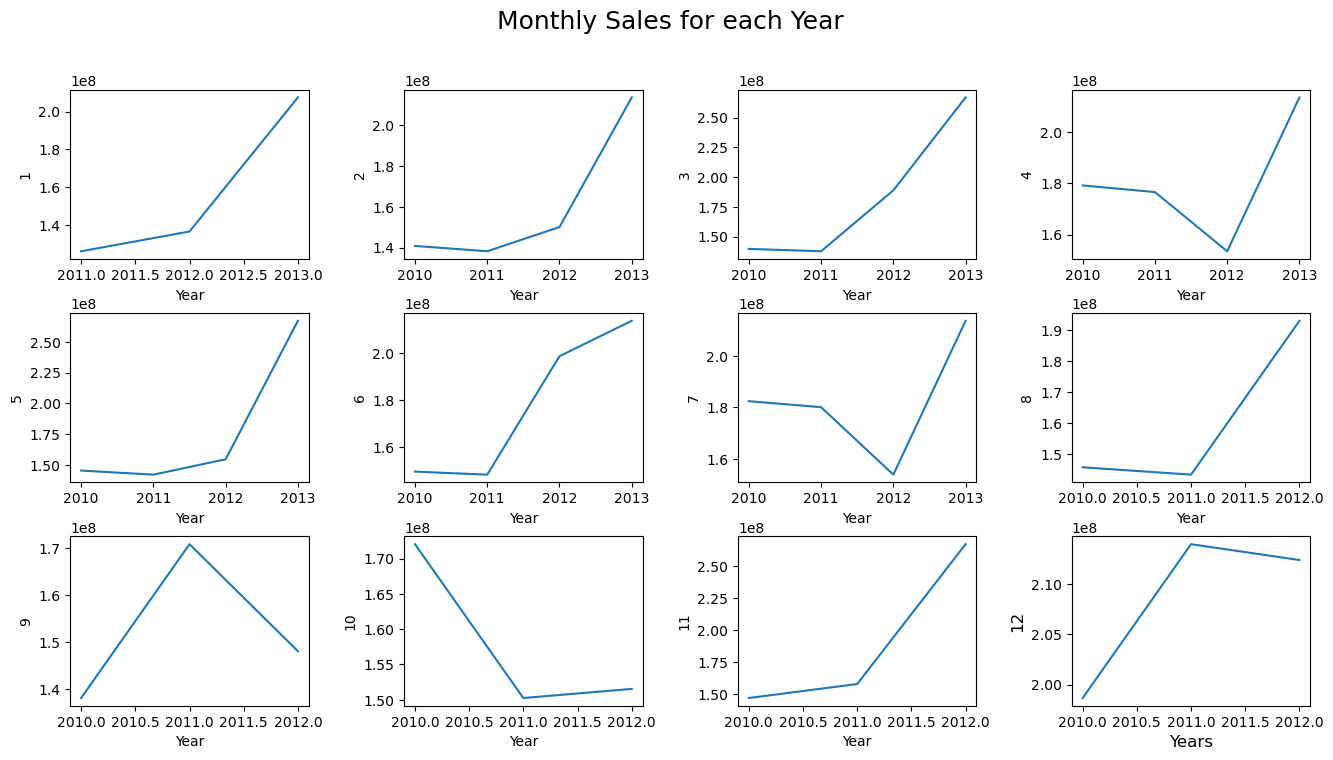

In [55]:
fig, axes = plt.subplots(3,4,figsize=(16,8))
plt.suptitle('Monthly Sales for each Year', fontsize=18)
k=1
for i in range(3):
    for j in range(4):
      sns.lineplot(ax=axes[i,j],data=data_monthly[k])
      plt.subplots_adjust(wspace=0.4,hspace=0.32)
      plt.ylabel(k,fontsize=12)
      plt.xlabel('Years',fontsize=12)
      k+=1

plt.show()

### Sales vs Temperature

C:\Users\vanda\AppData\Local\Temp\ipykernel_15884\2390283732.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df5['Temperature'])
C:\Users\vanda\New folder\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


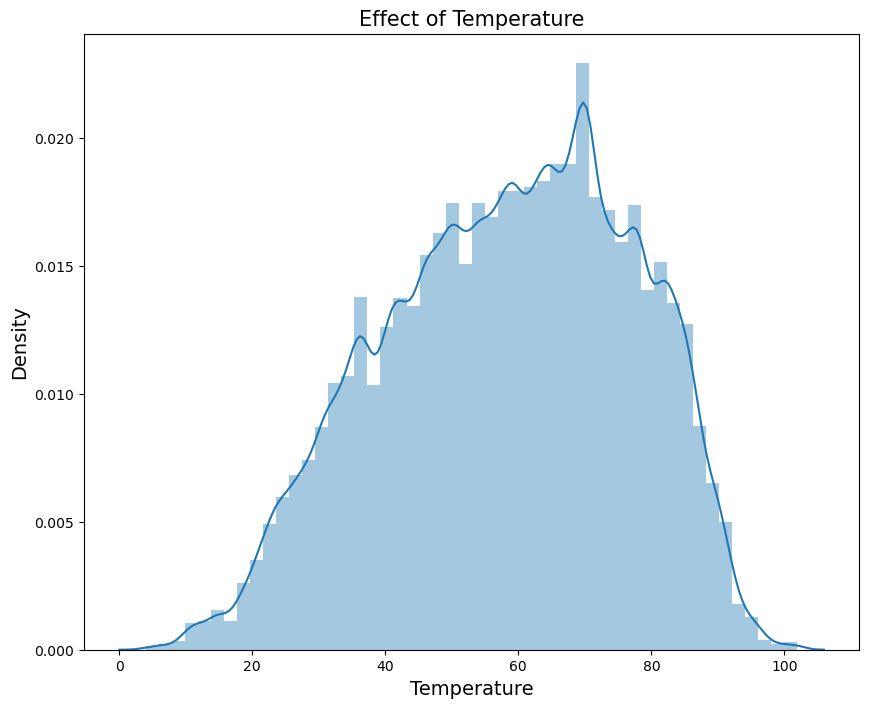

In [56]:
plt.figure(figsize=(10,8))
sns.distplot(df5['Temperature'])
plt.title('Effect of Temperature',fontsize=15)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.show()

### Holiday Distribution

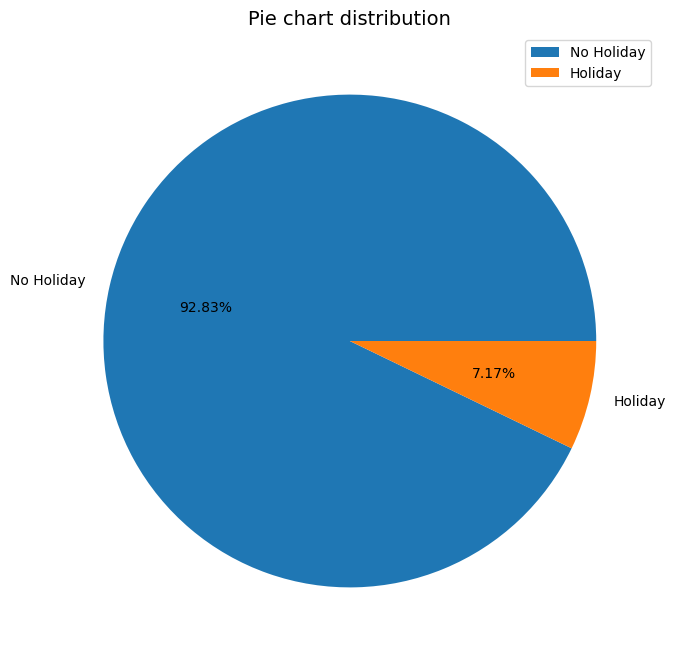

In [57]:
plt.figure(figsize=(8,8))
plt.pie(df5['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend() 
plt.show()  

## Average Sales Per Store

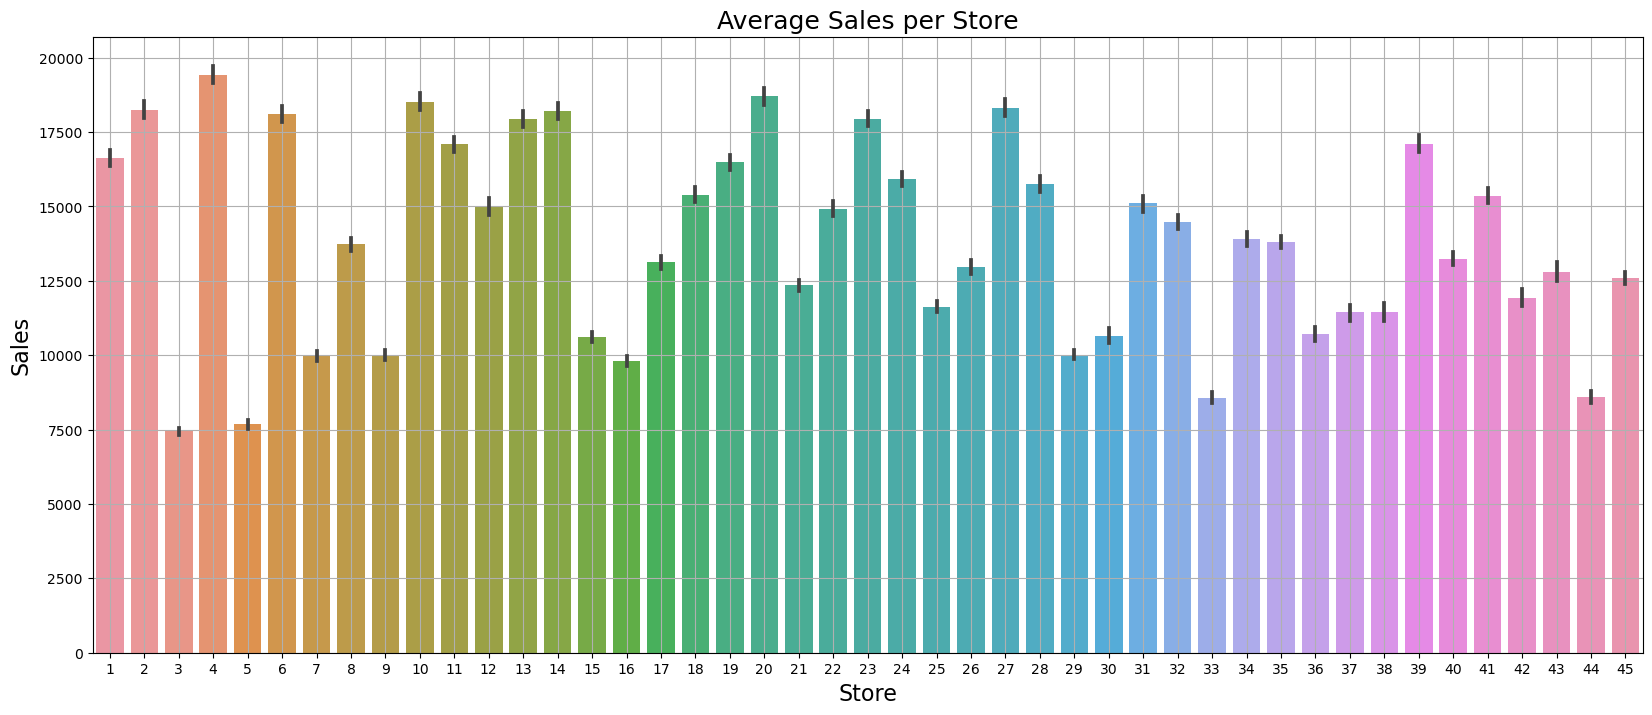

In [58]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=df5)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16) 
plt.xlabel('Store', fontsize=16)
plt.savefig('plots/avg_sales_store.png')
plt.show() 

### Data Normalisation

In [59]:
num_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']

In [60]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [61]:
df5 = normalization(df5.copy(),num_col)
df5

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Total_MarkDown,Day,Month,Year
0,1,1,2010-02-05,0.329886,0,1,0.630267,0.391118,0.050100,0.826259,0.480339,0.002155,5,2,2010
1,1,2,2010-02-05,0.669781,0,1,0.630267,0.391118,0.050100,0.826259,0.480339,0.002155,5,2,2010
2,1,3,2010-02-05,0.181856,0,1,0.630267,0.391118,0.050100,0.826259,0.480339,0.002155,5,2,2010
3,1,4,2010-02-05,0.528808,0,1,0.630267,0.391118,0.050100,0.826259,0.480339,0.002155,5,2,2010
4,1,5,2010-02-05,0.426569,0,1,0.630267,0.391118,0.050100,0.826259,0.480339,0.002155,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,2013-07-26,0.212205,0,2,0.451136,0.735681,0.667335,0.550954,0.447751,0.005901,26,7,2013
551475,45,95,2013-07-26,0.212205,0,2,0.451136,0.735681,0.667335,0.550954,0.447751,0.005901,26,7,2013
551476,45,96,2013-07-26,0.212205,0,2,0.451136,0.735681,0.667335,0.550954,0.447751,0.005901,26,7,2013
551477,45,97,2013-07-26,0.212205,0,2,0.451136,0.735681,0.667335,0.550954,0.447751,0.005901,26,7,2013


# Feature Engineering

In [62]:
cat_col = ['Store','Dept','Type']
data_cat = df5[cat_col].copy()

In [63]:
data_cat = pd.get_dummies(data_cat,columns=cat_col) 

In [64]:
data_cat.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_1,Type_2,Type_3
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [65]:
df5.shape

(522462, 15)

In [66]:
df5 = pd.concat([df5, data_cat],axis=1)

In [67]:
df5.shape

(522462, 144)

In [68]:
df5.drop(columns=cat_col,inplace=True)

In [69]:
df5.drop(columns=['Date'],inplace=True)

In [70]:
df5.shape

(522462, 140)

#### Applying Recursive Feature Elimination (RFE)

## Feature Selection

In [71]:
feature_col = df5.columns.difference(['Weekly_Sales'])
feature_col

Index(['CPI', 'Day', 'Dept_1', 'Dept_10', 'Dept_11', 'Dept_12', 'Dept_13',
       'Dept_14', 'Dept_16', 'Dept_17',
       ...
       'Store_7', 'Store_8', 'Store_9', 'Temperature', 'Total_MarkDown',
       'Type_1', 'Type_2', 'Type_3', 'Unemployment', 'Year'],
      dtype='object', length=139)

In [72]:
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=23)
radm_clf.fit(df5[feature_col], df5['Weekly_Sales']) 

C:\Users\vanda\New folder\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=23, oob_score=True)

In [73]:
import os
import pickle

# Define the file path
pkl_filename = "./models/feature_elim_regressor.pkl"

# Check if the directory exists, if not, create it
if not os.path.exists(os.path.dirname(pkl_filename)):
    os.makedirs(os.path.dirname(pkl_filename))

# Save the trained model to disk
with open(pkl_filename, 'wb') as file:
    pickle.dump(radm_clf, file)
    print("Saved model to disk")

Saved model to disk


In [74]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])

for f in range(df5[feature_col].shape[1]):
    feature_rank.loc[f] = [f+1,
                           df5[feature_col].columns[indices[f]],
                           radm_clf.feature_importances_[indices[f]]]

feature_rank

,rank,feature,importance
0,1,Year,1.153925e-01
1,2,Size,1.100543e-01
2,3,Dept_38,4.389030e-02
3,4,Month,4.219794e-02
4,5,Dept_2,3.455697e-02
...,...,...,...
134,135,Dept_37,3.195246e-05
135,136,Dept_48,3.050941e-05
136,137,Dept_77,2.241127e-05
137,138,Dept_39,7.880066e-07


In [75]:
x=feature_rank.loc[0:22,['feature']]
x=x['feature'].tolist()
print(x) 

['Year', 'Size', 'Dept_38', 'Month', 'Dept_2', 'Dept_40', 'Dept_72', 'CPI', 'Dept_95', 'Dept_94', 'Dept_13', 'Dept_90', 'Dept_92', 'Dept_91', 'Dept_8', 'Dept_93', 'Dept_4', 'Type_2', 'Dept_9', 'Temperature', 'Dept_79', 'Dept_5', 'Dept_23']


In [76]:
X = df5[x]
Y = df5['Weekly_Sales']

In [77]:
data = pd.concat([X,Y],axis=1)

In [78]:
data

,Year,Size,Dept_38,Month,Dept_2,Dept_40,Dept_72,CPI,Dept_95,Dept_94,...,Dept_8,Dept_93,Dept_4,Type_2,Dept_9,Temperature,Dept_79,Dept_5,Dept_23,Weekly_Sales
0,2010,0.630267,False,2,False,False,False,0.826259,False,False,...,False,False,False,False,False,0.391118,False,False,False,0.329886
1,2010,0.630267,False,2,True,False,False,0.826259,False,False,...,False,False,False,False,False,0.391118,False,False,False,0.669781
2,2010,0.630267,False,2,False,False,False,0.826259,False,False,...,False,False,False,False,False,0.391118,False,False,False,0.181856
3,2010,0.630267,False,2,False,False,False,0.826259,False,False,...,False,False,True,False,False,0.391118,False,False,False,0.528808
4,2010,0.630267,False,2,False,False,False,0.826259,False,False,...,False,False,False,False,False,0.391118,False,True,False,0.426569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,2013,0.451136,False,7,False,False,False,0.550954,False,True,...,False,False,False,True,False,0.735681,False,False,False,0.212205
551475,2013,0.451136,False,7,False,False,False,0.550954,True,False,...,False,False,False,True,False,0.735681,False,False,False,0.212205
551476,2013,0.451136,False,7,False,False,False,0.550954,False,False,...,False,False,False,True,False,0.735681,False,False,False,0.212205
551477,2013,0.451136,False,7,False,False,False,0.550954,False,False,...,False,False,False,True,False,0.735681,False,False,False,0.212205


In [79]:
import os

# Create the directory if it doesn't exist
directory = './datasets'
if not os.path.exists(directory):
    os.makedirs(directory) 

In [80]:
data.to_csv('./datasets/final_data.csv') 

# Model Selection and Training 

## Data Splitted into Training, Validation, Test

In [81]:
X = data.drop(['Weekly_Sales'],axis=1)
Y = data.Weekly_Sales

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

### Feature Normalisation

In [83]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [84]:
# Create and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [85]:
# Calculate R-squared score
lr_acc = r2_score(y_test, lr.predict(X_test_scaled)) * 100
print("Linear Regression Accuracy - ", lr_acc) 

Linear Regression Accuracy -  38.01018441192298


In [86]:
y_pred = lr.predict(X_test_scaled) 

In [87]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.10727506966381785
MSE 0.020652823059590916
RMSE 0.14371090097689498
R2 0.3801018575088504


In [88]:
import os

# Define the directory path
directory = "./predictions"

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Create a DataFrame for actual and predicted values
lr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_df.to_csv('./predictions/lr_real_pred.csv')
lr_df

,Actual,Predicted
184739,0.027161,0.109901
95121,0.219542,0.115393
226161,0.057797,0.187658
322132,0.091597,0.127294
383686,0.044406,0.143258
...,...,...
375661,0.295854,0.134340
376213,0.010850,0.065462
409381,0.060796,0.160958
17999,0.005125,0.169032


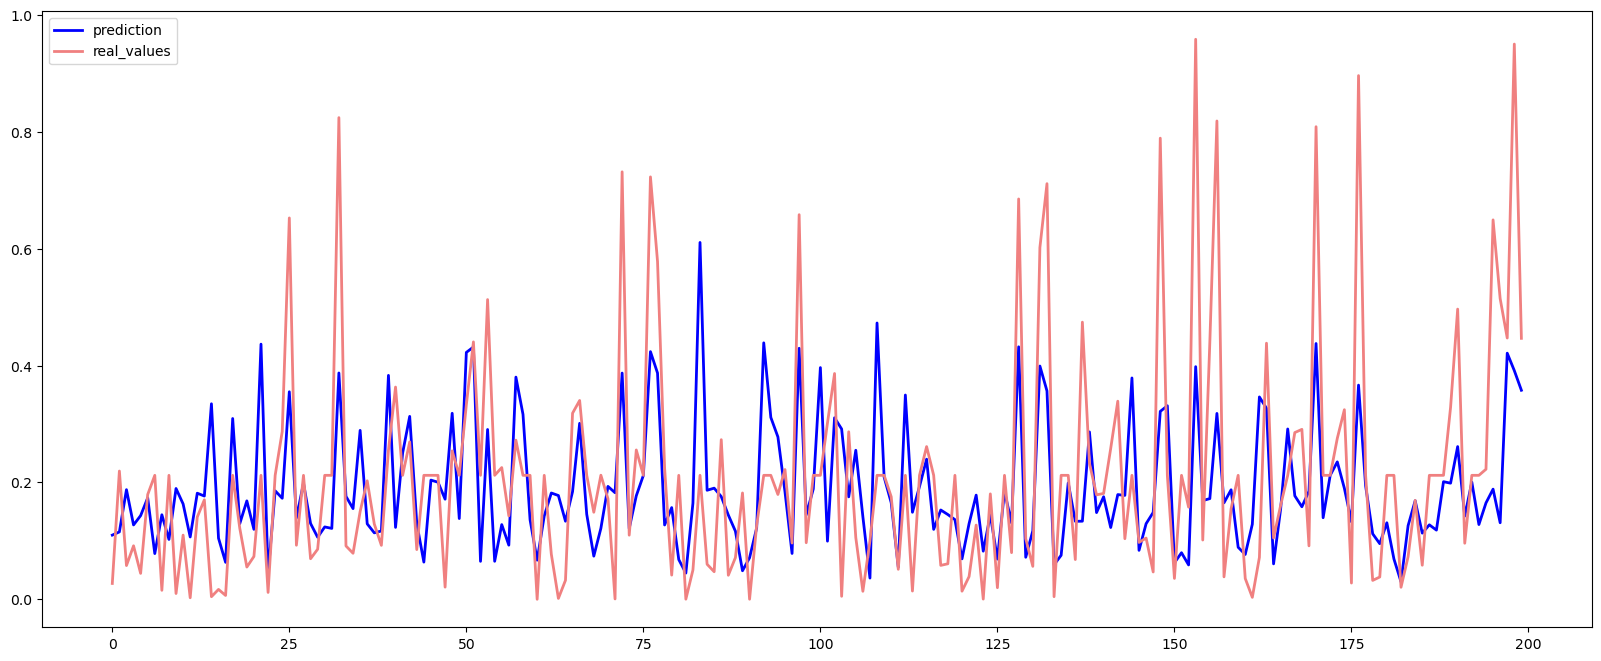

In [89]:
plt.figure(figsize=(20,8))
plt.plot(lr.predict(X_test_scaled[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show() 

In [90]:
pkl_filename = "./models/linear_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lr, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


## Random Forest Regression 

In [91]:
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [92]:
rf_acc = rf.score(X_test_scaled,y_test)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

Random Forest Regressor Accuracy -  73.57334411191366


In [93]:
y_pred = rf.predict(X_test_scaled)

In [94]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.05579387470522962
MSE 0.00880443090426484
RMSE 0.09383192902346642
R2 0.7357377613155551


In [95]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_df.to_csv('./predictions/rf_real_pred.csv')
rf_df

,Actual,Predicted
184739,0.027161,0.088123
95121,0.219542,0.092339
226161,0.057797,0.189008
322132,0.091597,0.109864
383686,0.044406,0.198015
...,...,...
375661,0.295854,0.100561
376213,0.010850,0.034365
409381,0.060796,0.086236
17999,0.005125,0.149584


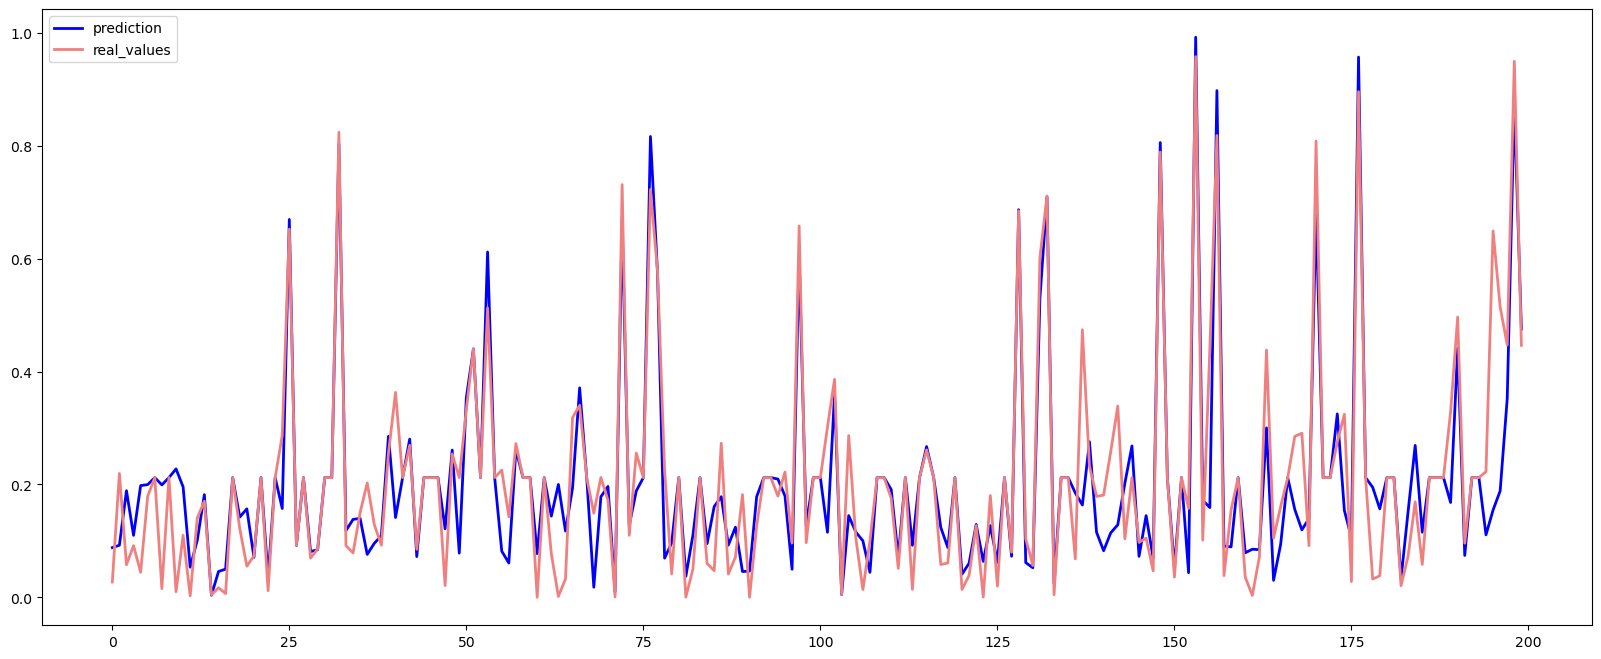

In [96]:
plt.figure(figsize=(20,8))
plt.plot(rf.predict(X_test_scaled[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show() 

In [97]:
pkl_filename = "./models/randomforest_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(rf, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


## KNN Regression

In [98]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],  # Example values for n_neighbors
    'weights': ['uniform', 'distance']  # Example values for weights
}

# Create the KNN regressor
knn = KNeighborsRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_knn = grid_search.best_estimator_

Best Parameters: {'n_neighbors': 9, 'weights': 'distance'}


In [99]:
# Evaluate the best model on the test set
mae = metrics.mean_absolute_error(y_test, best_knn.predict(X_test_scaled))
print("Mean Absolute Error on Test Set:", mae)

# Calculate KNeigbhbors Regressor Accuracy
knn_acc = best_knn.score(X_test_scaled, y_test) * 100
print("KNeigbhbors Regressor Accuracy - ", knn_acc) 

Mean Absolute Error on Test Set: 0.0643423839423514
KNeigbhbors Regressor Accuracy -  66.30167553518397


In [100]:
# Make predictions
y_pred = best_knn.predict(X_test_scaled)

In [101]:
# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.explained_variance_score(y_test, y_pred)

# Print evaluation metrics
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 0.0643423839423514
MSE: 0.011227094740872072
RMSE: 0.1059579857343092
R2: 0.6630287380978606


In [102]:
# Create a DataFrame for actual and predicted values
knn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
knn_df.to_csv('./predictions/knn_real_pred.csv')
knn_df

,Actual,Predicted
184739,0.027161,0.121852
95121,0.219542,0.101390
226161,0.057797,0.146708
322132,0.091597,0.061567
383686,0.044406,0.275824
...,...,...
375661,0.295854,0.097095
376213,0.010850,0.029589
409381,0.060796,0.080012
17999,0.005125,0.109108


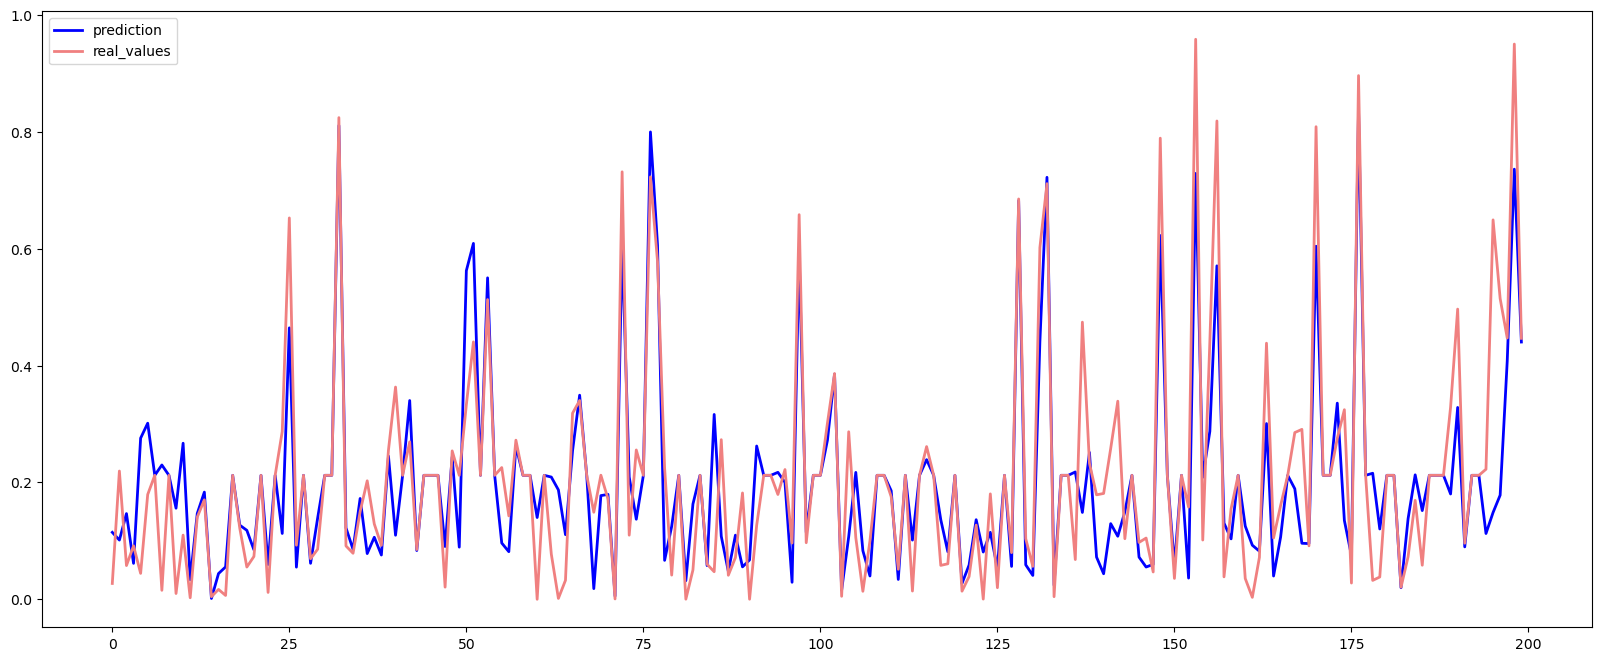

In [103]:
# Plot actual vs. predicted values for the first 200 samples
plt.figure(figsize=(20, 8))
plt.plot(best_knn.predict(X_test_scaled[:200]), label="prediction", linewidth=2.0, color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0, color='lightcoral')
plt.legend(loc="best")
plt.show()

In [104]:
pkl_filename = "./models/knn_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn, file)
  print("Saved model to disk")
else:
  print("Model already saved") 

Saved model to disk


## XG Boost Regression

In [105]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Example values for n_estimators
    'max_depth': [3, 5, 7],  # Example values for max_depth
    'learning_rate': [0.01, 0.1, 0.2]  # Example values for learning_rate
}

# Create the XGBoost regressor
xgb_reg = xgb.XGBRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_xgb_reg = grid_search.best_estimator_

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150}


In [106]:
# Evaluate the best model on the test set
mae = metrics.mean_absolute_error(y_test, best_xgb_reg.predict(X_test_scaled))
print("Mean Absolute Error on Test Set:", mae)

# Calculate XGBoost Regressor Accuracy
xgb_acc = best_xgb_reg.score(X_test_scaled, y_test) * 100
print("XGBoost Regressor Accuracy - ", xgb_acc)

Mean Absolute Error on Test Set: 0.05808813680901989
XGBoost Regressor Accuracy -  74.15837286942444


In [107]:
# Make predictions
y_pred = best_xgb_reg.predict(X_test_scaled)

In [108]:
# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.explained_variance_score(y_test, y_pred)

# Print evaluation metrics
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 0.05808813680901989
MSE: 0.008609519928985756
RMSE: 0.09278749877535096
R2: 0.7415857940933226


In [109]:
# Create a DataFrame for actual and predicted values
xgb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
xgb_df.to_csv('./predictions/xgb_real_pred.csv')
xgb_df

,Actual,Predicted
184739,0.027161,0.084187
95121,0.219542,0.105740
226161,0.057797,0.189727
322132,0.091597,0.113936
383686,0.044406,0.197978
...,...,...
375661,0.295854,0.116456
376213,0.010850,0.036469
409381,0.060796,0.096858
17999,0.005125,0.169382


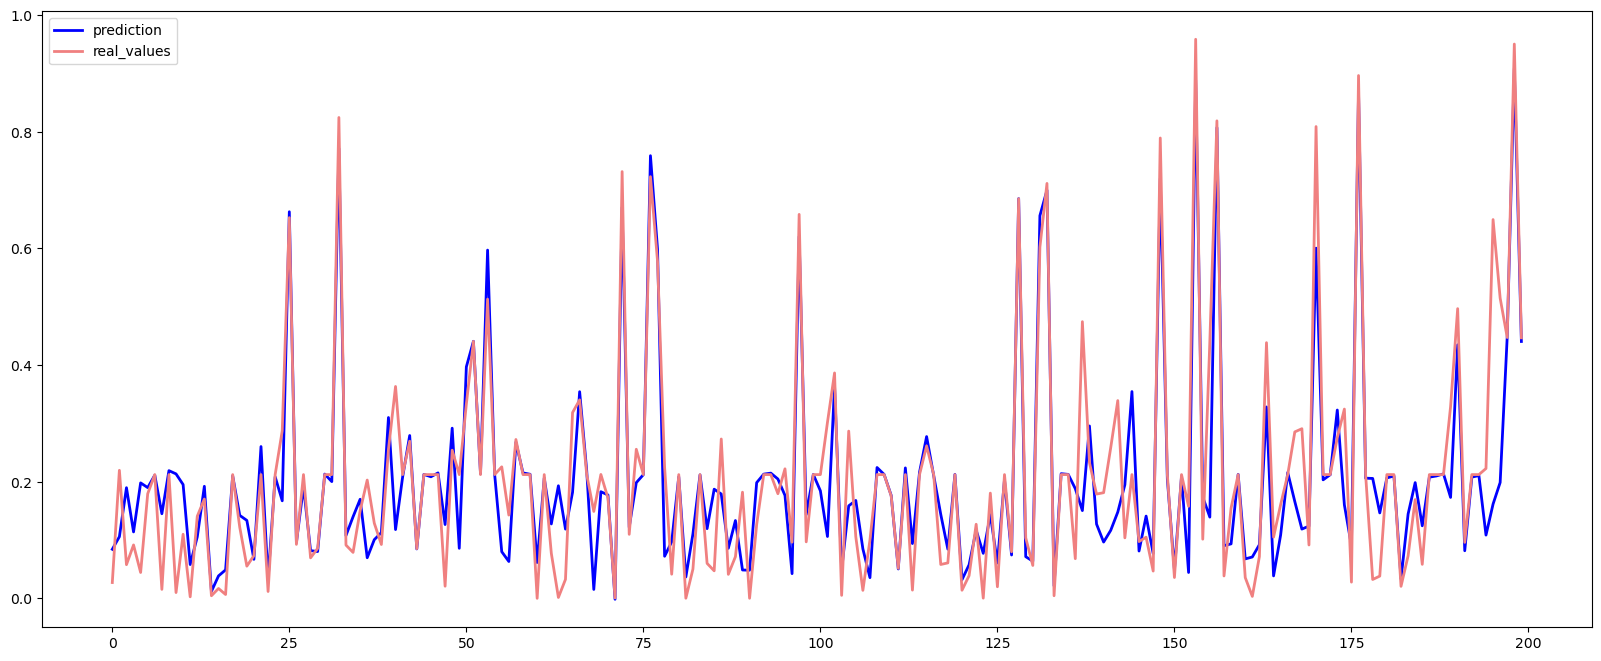

In [110]:
# Plot actual vs. predicted values for the first 200 samples
plt.figure(figsize=(20, 8))
plt.plot(best_xgb_reg.predict(X_test_scaled[:200]), label="prediction", linewidth=2.0, color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0, color='lightcoral')
plt.legend(loc="best")
plt.show()

In [111]:
pkl_filename = "./models/xgboost_regressor.pkl"
if not path.isfile(pkl_filename):
    # Saving the trained model to disk
    with open(pkl_filename, 'wb') as file:
        pickle.dump(best_xgb_reg, file)  
    print("Saved model to disk")
else:
    print("Model already saved")

Saved model to disk


## Deep Learning Neural Network

In [112]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [113]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [114]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [115]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the custom deep learning neural network
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_scaled.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))  # Added activation function
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_absolute_error', optimizer='adam')
    return model

# Create the model
model = create_model()

# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=5000)

C:\Users\vanda\New folder\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1408 - val_loss: 0.0960
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0917 - val_loss: 0.0846
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0827 - val_loss: 0.0789
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0778 - val_loss: 0.0753
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0744 - val_loss: 0.0725
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0715 - val_loss: 0.0704
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0697 - val_loss: 0.0685
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0686 - val_loss: 0.0676
Epoch 9/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0675 - val_loss: 0.0667
Epoch 10/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0666 - val_loss: 0.0662
Epoch 11/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0660 - val_loss: 0.0657
Epoch 12/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.

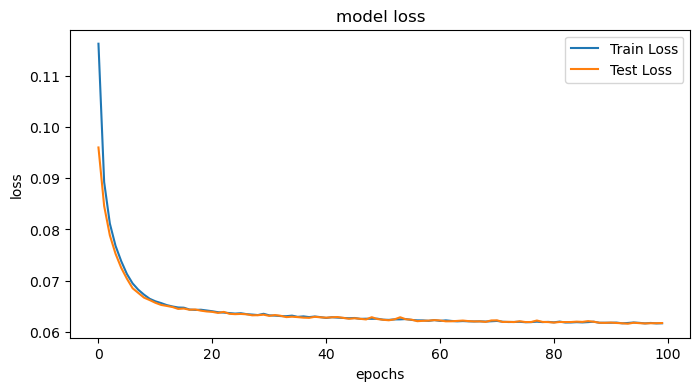

In [116]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

In [117]:
dnn_acc = metrics.r2_score(y_pred, y_test)*100
print("Deep Neural Network Accuracy - ",dnn_acc)

Deep Neural Network Accuracy -  63.369012233069924


In [118]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)

3266/3266 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


In [119]:
# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.explained_variance_score(y_test, y_pred)

# Print evaluation metrics
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 0.06189893572882068
MSE: 0.012028131538828384
RMSE: 0.10967283865583304
R2: 0.6581564068126862


In [120]:
import pandas as pd

# Reshape y_test and y_pred arrays to be 1-dimensional
y_test_1d = y_test.ravel()
y_pred_1d = y_pred.ravel()

# Create DataFrame for actual and predicted values
dnn_df = pd.DataFrame({'Actual': y_test_1d, 'Predicted': y_pred_1d})
dnn_df.to_csv('./predictions/dnn_real_pred.csv')
dnn_df

,Actual,Predicted
0,0.027161,0.056475
1,0.219542,0.071309
2,0.057797,0.118356
3,0.091597,0.072119
4,0.044406,0.119178
...,...,...
104488,0.295854,0.079490
104489,0.010850,0.006240
104490,0.060796,0.071692
104491,0.005125,0.120837


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


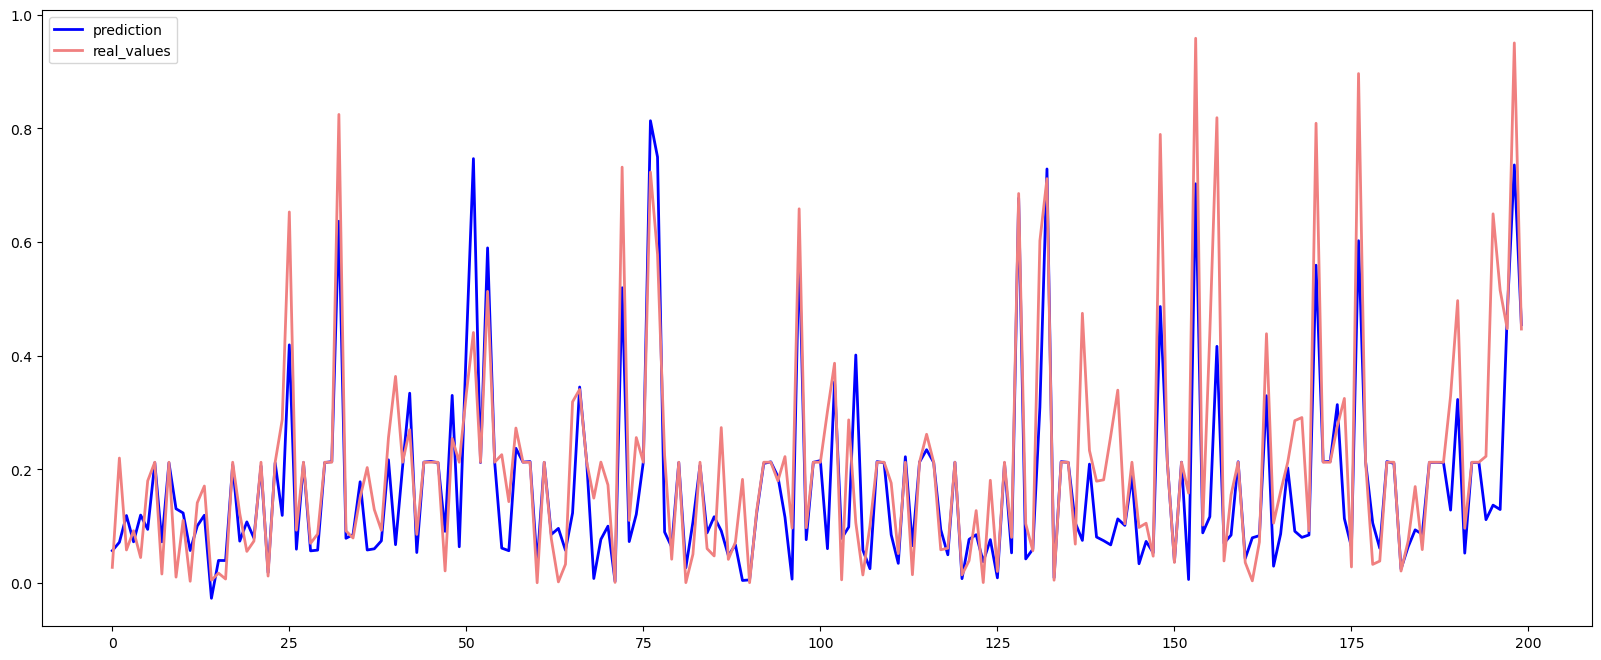

In [121]:
# Plot actual vs. predicted values for the first 200 samples
plt.figure(figsize=(20,8))
plt.plot(model.predict(X_test_scaled[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

In [122]:
filepath = './models/dnn_regressor.json'
weightspath = './models/dnn_regressor.h5'
if not path.isfile(filepath):
    # Serialize model to JSON
    model_json = model.to_json()
    with open(filepath, "w") as json_file:
        json_file.write(model_json)
    print("Saved model to disk")
else:
    print("Model already saved")

Saved model to disk


In [123]:
# Model accuracy data
lr_acc = 92.27828803090458
rf_acc = 97.91317472830829
knn_acc = 96.26724391234322
xgb_acc = 97.63894312208085
dnn_acc = 95.84402068213723

In [124]:
# Create a dictionary with model names and their accuracies
acc = {'model': ['Linear Regression', 'Random Forest', 'KNN', 'XGBoost', 'DNN'],
       'accuracy': [lr_acc, rf_acc, knn_acc, xgb_acc, dnn_acc]}

In [125]:
# Convert the dictionary to a DataFrame
acc_df = pd.DataFrame(acc)
acc_df

,model,accuracy
0,Linear Regression,92.278288
1,Random Forest,97.913175
2,KNN,96.267244
3,XGBoost,97.638943
4,DNN,95.844021


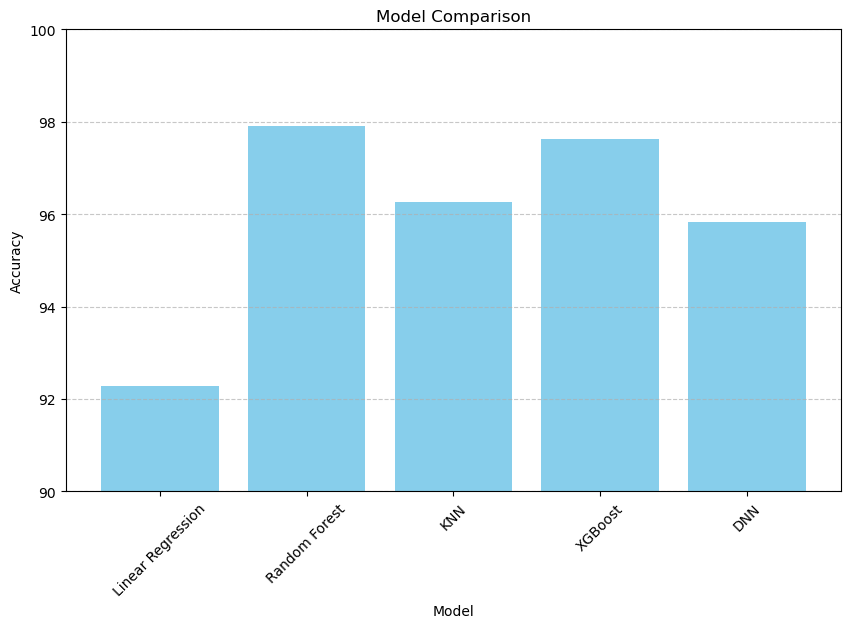

In [126]:
# Plot the model accuracies
plt.figure(figsize=(10, 6))
plt.bar(acc_df['model'], acc_df['accuracy'], color='skyblue')
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(90, 100)  # Set y-axis limits for better visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()